# ETL

In [ ]:
import icu_data_defs
import mimic
from constants import column_names,variable_type,clinical_source

In [4]:
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
mimic_etlM = mimic.MimicETLManager('data/mimic_data_test.h5','config/mimic_item_map.csv',data_dict)

In [4]:
etl_info=mimic_etlM.etl(panel_id=12, overwrite=True, save_steps=True)

(2017-07-07 00:04:45) BEGIN ETL for 18 components: [u'heart rate', u'blood pressure systolic', u'blood pressure diastolic', u'blood pressure mean', u'respiratory rate', u'temperature body', u'oxygen saturation pulse oximetry', u'weight body', u'output urine', u'glasgow coma scale motor', u'glasgow coma scale eye opening', u'glasgow coma scale verbal', u'normal saline', u'lactated ringers', u'norepinephrine', u'vasopressin', u'hemoglobin', u'lactate']
(2017-07-07 00:04:45)>> HEART RATE: 1/18
(2017-07-07 00:04:45)>>>> Extract...
(2017-07-07 00:04:45)>>>>>> Extracting 5 items from chartevents
(2017-07-07 00:05:50)<<<<<< --- (65.0s)
(2017-07-07 00:05:50)>>>>>> Combine DF
(2017-07-07 00:05:50)<<<<<< --- (0.0s)
(2017-07-07 00:05:50)>>>>>> Clean UOM
(2017-07-07 00:06:10)<<<<<< --- (20.0s)
(2017-07-07 00:06:10)<<<< --- (85.0s)
(2017-07-07 00:06:10)>>>> Transform...
(2017-07-07 00:07:57)<<<< --- (107.0s)
(2017-07-07 00:07:57)>>>> Clean...
(2017-07-07 00:08:48)>>>>>> Nominal to OneHot
(2017-07-0

In [46]:
etl_info

stat,component,EXTRACTED_id_count,EXTRACTED_data_count,TRANSFORMED_id_count,TRANSFORMED_data_count,CLEANED_id_count,CLEANED_data_count
0,heart rate,56716,7952939,56545,7923873,56545,7923135
1,blood pressure systolic,56680,6374824,56506,6331588,56506,6331002
2,blood pressure diastolic,56677,6371282,56507,6346872,56507,6346070
3,blood pressure mean,21921,2536271,21921,2536271,21921,2534398
4,respiratory rate,56673,7810019,56501,7781312,56501,7780557
5,temperature body,48916,1751447,48760,1734835,48760,1734221
6,oxygen saturation pulse oximetry,49011,6099827,48848,6073693,48848,6073120
7,weight body,31866,95425,31708,94484,31708,94446
8,output urine,52344,3633605,52252,3628884,52252,3627083
9,glasgow coma scale motor,27184,952565,27183,949241,27183,949198


In [47]:
etl_info['data_loss'] = (etl_info['EXTRACTED_data_count'] - etl_info['CLEANED_data_count'])
etl_info['id_loss'] = (etl_info['EXTRACTED_id_count'] - etl_info['CLEANED_id_count'])

In [48]:
etl_info['%data_loss'] = (etl_info['data_loss']/etl_info['EXTRACTED_data_count']).sort_values().apply(lambda x: str(np.round(x*100,3))+'%')
etl_info['%id_loss'] = (etl_info['id_loss']/etl_info['EXTRACTED_id_count']).sort_values().apply(lambda x: str(np.round(x*100,3))+'%')

In [49]:
etl_info.sort_values('%id_loss')

stat,component,EXTRACTED_id_count,EXTRACTED_data_count,TRANSFORMED_id_count,TRANSFORMED_data_count,CLEANED_id_count,CLEANED_data_count,data_loss,id_loss,%data_loss,%id_loss
3,blood pressure mean,21921,2536271,21921,2536271,21921,2534398,1873,0,0.074%,0.0%
10,glasgow coma scale eye opening,27190,956672,27189,953638,27189,953595,3077,1,0.322%,0.004%
9,glasgow coma scale motor,27184,952565,27183,949241,27183,949198,3367,1,0.353%,0.004%
11,glasgow coma scale verbal,27188,954700,27186,950956,27186,950913,3787,2,0.397%,0.007%
16,hemoglobin,57036,1167921,57030,985037,57030,985006,182915,6,15.662%,0.011%
12,normal saline,19770,771272,19767,771272,19767,505941,265331,3,34.402%,0.015%
13,lactated ringers,16593,269864,16579,269655,16579,255324,14540,14,5.388%,0.084%
17,lactate,34319,393608,34287,382411,34287,382347,11261,32,2.861%,0.093%
8,output urine,52344,3633605,52252,3628884,52252,3627083,6522,92,0.179%,0.176%
14,norepinephrine,7358,632673,7341,631779,7341,569450,63223,17,9.993%,0.231%


In [52]:
data_count = etl_info.set_index('component')['CLEANED_data_count']
data_count.sort_values(ascending=False)/data_count.max()

component
heart rate                          1.000000
respiratory rate                    0.982005
blood pressure diastolic            0.800954
blood pressure systolic             0.799053
oxygen saturation pulse oximetry    0.766505
output urine                        0.457784
blood pressure mean                 0.319873
temperature body                    0.218881
hemoglobin                          0.124320
glasgow coma scale eye opening      0.120356
glasgow coma scale verbal           0.120017
glasgow coma scale motor            0.119801
norepinephrine                      0.071872
normal saline                       0.063856
lactate                             0.048257
lactated ringers                    0.032225
vasopressin                         0.021359
weight body                         0.011920
Name: CLEANED_data_count, dtype: float64

In [58]:
etl_info.component = etl_info.component.astype(str)
etl_info.to_hdf('data/mimic_data_test.h5','etl_info',format='t', data_columns=[column_names.COMPONENT])

# Feature Factory

In [1]:
import icu_data_defs
import mimic
from constants import column_names,variable_type,clinical_source
import transformers
import utils
import features

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
random_state=42

all_ids = mimic.get_all_hadm_ids()

#these test IDs will never be touched again. They are sacred
train_ids,test_ids = train_test_split(all_ids,test_size=0.1,random_state=random_state)
train_ids,validate_ids = train_test_split(train_ids,test_size=(1.0/9.0),random_state=random_state)

print 'Train (80%):', len(train_ids),'>',train_ids[:5],'...'
print 'Validate (10%):', len(validate_ids),'>',validate_ids[:5],'...'
print 'Test (10%):', len(test_ids),'>',test_ids[:5],'...'

Train (80%): 47180 > [139698, 127590, 178959, 139276, 196600] ...
Validate (10%): 5898 > [112338, 107467, 158733, 144544, 115417] ...
Test (10%): 5898 > [167957, 164747, 124147, 184424, 136508] ...


In [3]:
"""
Pre-processors for each df
"""
hdf5_fname = 'data/mimic_simple.h5'
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
mimic_etlM = mimic.MimicETLManager(hdf5_fname,'config/mimic_item_map.csv',data_dict)

pre_processors = Pipeline([
            ('drop_small_columns',transformers.remove_small_columns(threshold=50)),
            ('drop_low_id_count',transformers.record_threshold(threshold=20)),
            ('quantitative only',transformers.filter_var_type([variable_type.QUANTITATIVE])),
            ('combine_like_columns',transformers.combine_like_cols())
        ])

factory = features.DataSetFactory(features=None,
                              resample_freq=None,
                              data_dict=data_dict,
                              ETL_manager=mimic_etlM,
                              data_set_root='simple_processing',
                              pre_processors=pre_processors)

In [4]:
factory.get_params()

{'ETL_manager': <mimic.MimicETLManager at 0xd820b70>,
 'data_dict': <icu_data_defs.data_dictionary at 0xd820b38>,
 'data_set_root': 'simple_processing',
 'features': None,
 'force_preprocessing': False,
 'hdf5_fname_target': None,
 'pre_processors': Pipeline(steps=[('drop_small_columns', remove_small_columns(threshold=50)), ('drop_low_id_count', record_threshold(threshold=20)), ('quantitative only', filter_var_type(var_types=['qn'])), ('combine_like_columns', combine_like_cols())]),
 'pre_processors__combine_like_columns': combine_like_cols(),
 'pre_processors__drop_low_id_count': record_threshold(threshold=20),
 'pre_processors__drop_low_id_count__threshold': 20,
 'pre_processors__drop_small_columns': remove_small_columns(threshold=50),
 'pre_processors__drop_small_columns__threshold': 50,
 'pre_processors__quantitative only': filter_var_type(var_types=['qn']),
 'pre_processors__quantitative only__var_types': ['qn'],
 'pre_processors__steps': [('drop_small_columns',
   remove_small_co

In [5]:
"""
Some features
"""

# SBP
component = data_dict.components.BLOOD_PRESSURE_SYSTOLIC
sbp_mean = features.SimpleFeature('mean',component,
                                       pre_processor=transformers.GroubyAndFFill(level=column_names.ID),
                                       fillna_method=transformers.fill_mean())

sbp_std = features.SimpleFeature('std',component,
                                       fillna_method=transformers.fill_zero())

sbp_count = features.SimpleFeature('count',component,
                                       fillna_method=transformers.fill_zero())

#DBP
component = data_dict.components.BLOOD_PRESSURE_DIASTOLIC
dbp_mean = features.SimpleFeature('mean',component,
                                       pre_processor=transformers.GroubyAndFFill(level=column_names.ID),
                                       fillna_method=transformers.fill_mean())

dbp_std = features.SimpleFeature('std',component,
                                       fillna_method=transformers.fill_zero())

dbp_count = features.SimpleFeature('count',component,
                                       fillna_method=transformers.fill_zero())

#MAP
component = data_dict.components.BLOOD_PRESSURE_MEAN
map_mean = features.SimpleFeature('mean',component,
                                       pre_processor=transformers.GroubyAndFFill(level=column_names.ID),
                                       fillna_method=transformers.fill_mean())

map_std = features.SimpleFeature('std',component,
                                       fillna_method=transformers.fill_zero())

map_count = features.SimpleFeature('count',component,
                                       fillna_method=transformers.fill_zero())

# HEART_RATE
component = data_dict.components.HEART_RATE
hr_mean = features.SimpleFeature('mean',component,
                                       pre_processor=transformers.GroubyAndFFill(level=column_names.ID),
                                       fillna_method=transformers.fill_mean())

hr_std = features.SimpleFeature('std',component,
                                       fillna_method=transformers.fill_zero())

hr_count = features.SimpleFeature('count',component,
                                       fillna_method=transformers.fill_zero())


# URINE OUTPUT
component = data_dict.components.OUTPUT_URINE
#mean
data_specs = {
    column_names.COMPONENT: component,
    column_names.UNITS: 'mL'
}
uop_vol_sum = features.Feature('SUM',data_specs,'sum',
                                 fillna_method=transformers.fill_zero())

# rate
data_specs = {
    column_names.COMPONENT: component,
    column_names.UNITS: ['mL/hr','mL/kg/hr']
}
uop_rate_mean = features.Feature('MEAN',data_specs,'mean',
                                 pre_processor=transformers.GroubyAndBFill(level=column_names.ID),
                                 fillna_method=transformers.fill_zero())

#count (for all uom)
uop_count = features.SimpleFeature('count',component,
                                       fillna_method=transformers.fill_zero())

#LACTATE (for labels)
component = data_dict.components.LACTATE
label = features.Feature('LABEL',{column_names.COMPONENT:component},'mean')
lac_mean = features.SimpleFeature('mean',component,
                                       pre_processor=transformers.GroubyAndFFill(level=column_names.ID),
                                       fillna_method=transformers.fill_mean())
lac_most_recent = features.SimpleFeature('last',component,
                                          fillna_method=Pipeline([
                                                        ('ffill',transformers.GroubyAndFFill(level=column_names.ID)),
                                                        ('fill_mean',transformers.fill_mean())
                                                    ]))
lac_count = features.SimpleFeature('count',component,
                                           fillna_method=transformers.fill_zero())

# Models and Stuff

In [69]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Lactate -> Next Lactate

### Regression without CrossValidation

In [ ]:
factory.resample_freq='2H'
factory.hdf5_fname_target = 'data/qn_combine_all.h5'
factory.features = [lac_mean,lac_most_recent,lac_count,label]

In [6]:
df_lactate_train = factory.fit_transform(train_ids)

(2017-07-12 19:56:04) FEATURIZE... #F=4, #ids=47180, fit->True
(2017-07-12 19:56:04)>> PRE-PROCESSING & JOIN: #C=1, [u'lactate']
(2017-07-12 19:56:05)>>>> lactate - 1/1
(2017-07-12 19:56:05)>>>>>> READ DF...
(2017-07-12 19:56:07)<<<<<< --- (2.0s)
(2017-07-12 19:56:07)>>>>>> PREPROCESS...
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *fit* Filter columns (remove_small_columns) (142289, 63)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *transform* Filter columns (remove_small_columns) (142289, 63)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *fit* Filter columns (record_threshold) (142289, 4)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *transform* Filter columns (record_threshold) (142289, 4)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *fit* Filter columns (filter_var_type) (142289, 4)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *transform* Filter columns (

In [7]:
df_lactate_validate = factory.transform(validate_ids)

(2017-07-12 20:00:59) FEATURIZE... #F=4, #ids=5898, fit->False
(2017-07-12 20:00:59)>> PRE-PROCESSING & JOIN: #C=1, [u'lactate']
(2017-07-12 20:00:59)>>>> lactate - 1/1
(2017-07-12 20:00:59)>>>>>> READ DF...
(2017-07-12 20:01:00)<<<<<< --- (1.0s)
(2017-07-12 20:01:00)>>>>>> PREPROCESS...
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> *transform* Filter columns (remove_small_columns) (18340, 63)
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> *transform* Filter columns (record_threshold) (18340, 4)
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> *transform* Filter columns (filter_var_type) (18340, 4)
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> TRANSFORM Combine like columns (18340, 4)
(2017-07-12 20:01:00)>>>>>>>> ('lactate', 'known', 'qn', 'mmol/L')
(2017-07-12 20:01:00)<<<<<<<< --- (0.0s)
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> SAVE DF... (18336, 1) -> simple_processing/39009739

In [8]:
y_train = df_lactate_train.loc[:,['LABEL']].shift(-1).dropna().iloc[:,0]
y_validate = df_lactate_validate.loc[:,['LABEL']].shift(-1).dropna().iloc[:,0]

X_train = df_lactate_train.drop('LABEL',axis=1).loc[y_train.index]
X_validate = df_lactate_validate.drop('LABEL',axis=1).loc[y_validate.index]

In [11]:
print X_train.shape,y_train.shape
print X_validate.shape,y_validate.shape

(131099, 3) (131099L,)
(16937, 3) (16937L,)


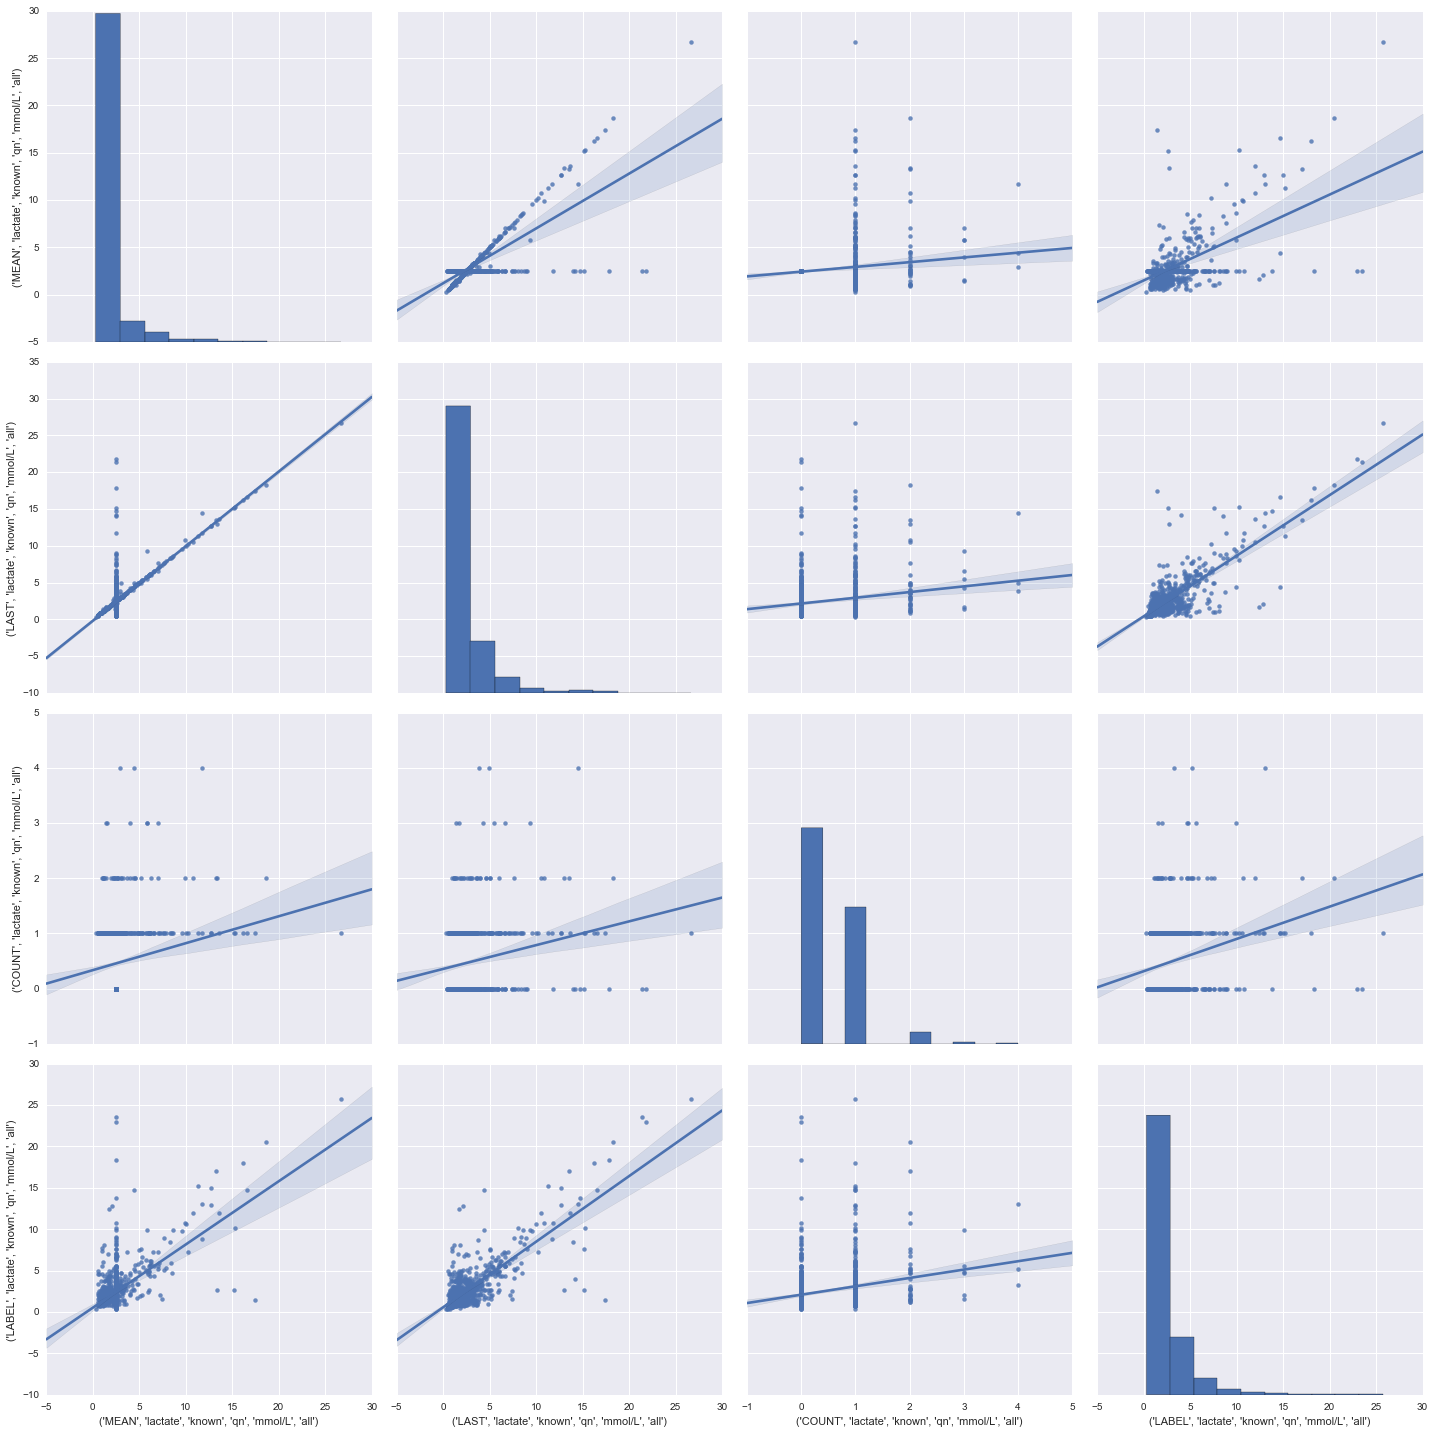

In [12]:
df_viz = X_train.join(y_train).sample(1000)
sns.pairplot(df_viz, size=5,kind="reg")

In [16]:
scaler = StandardScaler()
lin_reg = LinearRegression()

pipeline = Pipeline([
        ('scaler',scaler),
        ('lin_reg',lin_reg)
    ])

In [ ]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_validate)
rmse = np.sqrt(mean_squared_error(y_validate,y_pred))
r_2 = pipeline.score(X_validate,y_validate)

In [32]:
print 'RMSE:',rmse
print 'R^2:',r_2
pd.Series(lin_reg.coef_,index=X_train.columns,name='coef').sort_values().to_frame()

RMSE: 1.58625725051
R^2: 0.542388741971


,,,,,,coef
feature,component,status,variable_type,units,description,
MEAN,lactate,known,qn,mmol/L,all,-0.309044
COUNT,lactate,known,qn,mmol/L,all,0.201063
LAST,lactate,known,qn,mmol/L,all,2.043892


In [56]:

data

feature                          MEAN    LAST   COUNT       pred
component                     lactate lactate lactate           
status                          known   known   known           
variable_type                      qn      qn      qn           
units                          mmol/L  mmol/L  mmol/L           
description                       all     all     all           
id     datetime                                                 
100024 2170-09-19 16:00:00   2.533278     1.4       0   1.472052
       2170-09-20 02:00:00   2.533278     2.6       0   2.454599
       2170-09-20 04:00:00   3.200000     3.2       1   3.163353
100031 2140-11-13 02:00:00   2.533278     2.3       0   2.208962
       2140-11-14 02:00:00   2.533278     1.7       0   1.717688
       2140-11-14 04:00:00   1.200000     1.2       1   1.854940
100060 2111-05-25 06:00:00   0.700000     0.7       1   1.527837
100061 2178-12-26 14:00:00   2.533278     1.7       0   1.717688
       2178-12-26 22:00:00   2.533278     2.5       0   2.372720
       2178-12-27 00:00:00   7.500000     7.5       1   5.976438
       2178-12-27 04:00:00   2.533278     8.7       0   7.449215
       2178-12-27 10:00:00   2.533278    10.3       0   8.759278
       2178-12-27 12:00:00   5.100000     5.1       1   4.406344
100088 2176-06-06 12:00:00   1.400000     1.4       1   1.985782
       2176-06-06 14:00:00   1.300000     1.3       1   1.920361
       2176-06-06 16:00:00   1.400000     1.4       1   1.985782
100098 2108-04-04 12:00:00   1.900000     1.9       1   2.312885
       2108-04-04 14:00:00   3.000000     3.8       2   4.014754
       2108-04-04 16:00:00   5.900000     7.1       2   6.239467
       2108-04-04 18:00:00   6.900000     6.8       2   5.829247
       2108-04-04 20:00:00   8.000000     8.0       1   6.303541
       2108-04-04 22:00:00   9.600000     9.6       1   7.350271
       2108-04-05 02:00:00   2.533278    10.4       0   8.841157
       2108-04-05 08:00:00   2.533278     7.8       0   6.712304
       2108-04-05 10:00:00  10.100000    10.1       1   7.677374
       2108-04-05 12:00:00  10.000000    10.0       1   7.611954
       2108-04-05 16:00:00   2.533278    10.5       0   8.923036
       2108-04-05 20:00:00   2.533278    11.1       0   9.414309
       2108-04-06 00:00:00   2.533278    11.0       0   9.332430
       2108-04-06 02:00:00  10.700000    10.7       1   8.069898
...                               ...     ...     ...        ...
199812 2154-10-01 16:00:00   2.533278     0.6       0   0.817020
       2154-10-05 06:00:00   2.533278     1.2       0   1.308294
       2154-10-08 16:00:00   2.533278     0.8       0   0.980778
       2154-10-09 10:00:00   2.533278     1.0       0   1.144536
       2154-10-09 12:00:00   0.700000     0.7       1   1.527837
199816 2186-07-30 16:00:00   2.533278     6.9       0   5.975394
       2186-07-30 20:00:00   2.533278     7.3       0   6.302909
       2186-07-30 22:00:00   2.100000     2.1       1   2.443726
199826 2113-05-11 22:00:00   2.533278     3.7       0   3.355267
       2113-05-12 04:00:00   2.533278     1.3       0   1.390173
       2113-05-13 00:00:00   2.533278     1.2       0   1.308294
       2113-05-14 00:00:00   2.533278     1.2       0   1.308294
       2113-05-14 20:00:00   2.533278     1.0       0   1.144536
       2113-05-15 04:00:00   2.533278     1.2       0   1.308294
       2113-05-15 06:00:00   1.200000     1.2       1   1.854940
199847 2167-01-10 06:00:00   1.500000     1.5       1   2.051202
199855 2116-12-14 06:00:00   4.850000     3.4       2   3.382759
       2116-12-14 08:00:00   2.500000     2.5       1   2.705408
       2116-12-14 10:00:00   2.700000     2.6       2   3.081582
       2116-12-14 12:00:00   2.466667     2.3       3   3.201559
       2116-12-14 16:00:00   2.533278     2.2       0   2.127083
       2116-12-15 02:00:00   2.533278     1.9       0   1.881446
       2116-12-15 04:00:00   1.700000     1.7       1   2.182043
199930 2114-03-20 06:00:00   2.5332

('MEAN', 'lactate', 'known', 'qn', 'mmol/L', 'all')


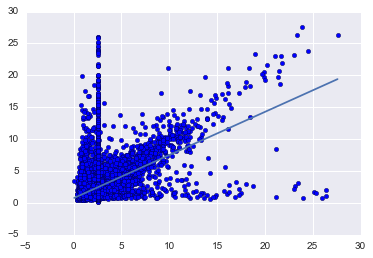

('LAST', 'lactate', 'known', 'qn', 'mmol/L', 'all')


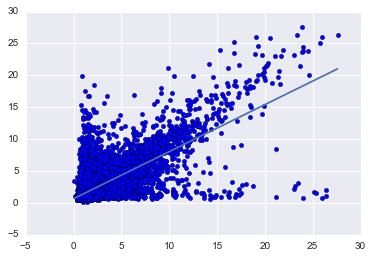

('COUNT', 'lactate', 'known', 'qn', 'mmol/L', 'all')


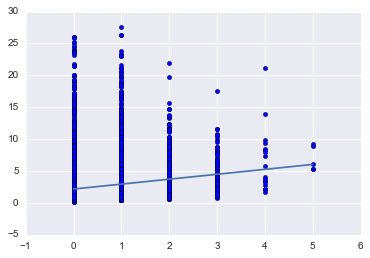

In [70]:
data = X_validate.copy()
data['pred'] = y_pred
for col_name in X_validate.columns:
    pipeline.fit(X_train.loc[:,[col_name]],y_train)
    print col_name
    val_col = data.loc[:,[col_name]].sort_values(col_name)
    sns.plt.scatter(X_validate[col_name],y_validate)
    sns.plt.plot(val_col,pipeline.predict(val_col))
    sns.plt.show()

### With Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [43]:
scores_r2 = cross_val_score(pipeline,X_train,y_train, scoring='r2',cv=10)
scores_nmse = cross_val_score(pipeline,X_train,y_train, scoring='neg_mean_squared_error',cv=10)

print 'Cross Validation, K-Fold'
print 'R^2: {}, {}'.format(scores_r2.mean(),scores_r2.std())
print 'RMSE: {}, {}'.format(np.sqrt(-1.0*scores_nmse).mean(),np.sqrt(-1.0*scores_nmse).std())

cv_shuffle = ShuffleSplit(n_splits=10,test_size=0.1)

scores_r2 = cross_val_score(pipeline,X_train,y_train, scoring='r2',cv=cv_shuffle)
scores_nmse = cross_val_score(pipeline,X_train,y_train, scoring='neg_mean_squared_error', cv=cv_shuffle)

print '\nCross Validation, ShuffleSplit'
print 'R^2: {}, {}'.format(scores_r2.mean(),scores_r2.std())
print 'RMSE: {}, {}'.format(np.sqrt(-1.0*scores_nmse).mean(),np.sqrt(-1.0*scores_nmse).std())

Cross Validation, K-Fold
R2: 0.550172721419, 0.0467741587239
RMSE: 1.6467916238, 0.0985459060145

Cross Validation, ShuffleSplit
R2: 0.556988588385, 0.0212943169516
RMSE: 1.62975088077, 0.0276377946618


R2: 0.55070392707, 0.0407979906403
RMSE: 1.65078620828, 0.0667136717948


In [19]:
ids = train_ids[:1000]
df_train1 = fac.fit_transform(ids)
df_val1 = fac.transform(validate_ids[:100])

(2017-07-12 13:53:22) FEATURIZE... #F=2, #ids=1000, fit->True
(2017-07-12 13:53:22)>> PRE-PROCESSING & JOIN: #C=1, [u'lactate']
(2017-07-12 13:53:22)>>>> lactate - 1/1
(2017-07-12 13:53:22)>>>>>> READ DF...
(2017-07-12 13:53:23)<<<<<< --- (1.0s)
(2017-07-12 13:53:23)>>>>>> PREPROCESS...
(2017-07-12 13:53:23)<<<<<< --- (0.0s)
(2017-07-12 13:53:23)>>>>>> *fit* Filter columns (remove_small_columns) (2925, 63)
(2017-07-12 13:53:23)<<<<<< --- (0.0s)
(2017-07-12 13:53:23)>>>>>> *transform* Filter columns (remove_small_columns) (2925, 63)
(2017-07-12 13:53:23)<<<<<< --- (0.0s)
(2017-07-12 13:53:23)>>>>>> *fit* Filter columns (record_threshold) (2925, 4)
(2017-07-12 13:53:23)<<<<<< --- (0.0s)
(2017-07-12 13:53:23)>>>>>> *transform* Filter columns (record_threshold) (2925, 4)
(2017-07-12 13:53:23)<<<<<< --- (0.0s)
(2017-07-12 13:53:23)>>>>>> FIT Combine like columns (2925, 4)
(2017-07-12 13:53:23)>>>>>>>> ('lactate', 'known', 'qn', 'mmol/L')
(2017-07-12 13:53:23)<<<<<<<< --- (0.0s)
(2017-07-12 

In [21]:
root = fac.get_data_set_key(ids)
print root
df_joined1 = utils.read_and_reconstruct(hdf5_fname_target,'{}/{}'.format(root,'joined'))

lactate_only/369792949


In [23]:
ids = train_ids[1000:2000]
df_train2 = fac.fit_transform(ids)

(2017-07-12 13:55:05) FEATURIZE... #F=2, #ids=1000, fit->True
(2017-07-12 13:55:06)>> PRE-PROCESSING & JOIN: #C=1, [u'lactate']
(2017-07-12 13:55:06)>>>> lactate - 1/1
(2017-07-12 13:55:06)>>>>>> READ DF...
(2017-07-12 13:55:06)<<<<<< --- (0.0s)
(2017-07-12 13:55:06)>>>>>> PREPROCESS...
(2017-07-12 13:55:06)<<<<<< --- (0.0s)
(2017-07-12 13:55:06)>>>>>> *fit* Filter columns (remove_small_columns) (3082, 63)
(2017-07-12 13:55:06)<<<<<< --- (0.0s)
(2017-07-12 13:55:06)>>>>>> *transform* Filter columns (remove_small_columns) (3082, 63)
(2017-07-12 13:55:06)<<<<<< --- (0.0s)
(2017-07-12 13:55:06)>>>>>> *fit* Filter columns (record_threshold) (3082, 4)
(2017-07-12 13:55:06)<<<<<< --- (0.0s)
(2017-07-12 13:55:06)>>>>>> *transform* Filter columns (record_threshold) (3082, 4)
(2017-07-12 13:55:06)<<<<<< --- (0.0s)
(2017-07-12 13:55:06)>>>>>> FIT Combine like columns (3082, 4)
(2017-07-12 13:55:06)>>>>>>>> ('lactate', 'known', 'qn', 'mmol/L')
(2017-07-12 13:55:06)<<<<<<<< --- (0.0s)
(2017-07-12 

In [24]:
root = fac.get_data_set_key(ids)
print root
df_joined2 = utils.read_and_reconstruct(hdf5_fname_target,'{}/{}'.format(root,'joined'))

lactate_only/342039148


In [27]:
"""
Some more features
"""
# HEART_RATE
data_specs[column_names.COMPONENT] = data_dict.components.HEART_RATE
fts.append(features.Feature('MEAN',data_specs.copy(),'mean',transformers.GroubyAndFFill(level=column_names.ID)))
fts.append(features.Feature('COUNT',data_specs.copy(), 'count', transformers.fill_zero()))


# URINE OUTPUT
data_specs[column_names.COMPONENT]=data_dict.components.OUTPUT_URINE
data_specs[column_names.UNITS]= 'mL'
fts.append(features.Feature('SUM',data_specs.copy(),'sum',transformers.fill_zero()))

data_specs[column_names.UNITS] = ['mL/hr','mL/kg/hr']
fts.append(features.Feature('MEAN',data_specs.copy(),'mean',transformers.fill_zero()))

data_specs = {column_names.COMPONENT: data_dict.components.OUTPUT_URINE}
fts.append(features.Feature('COUNT',data_specs.copy(),'count',transformers.fill_zero()))

In [28]:
n_hrs=2
hdf5_fname_target = 'data/test.h5'
fac2 = features.DataSetFactory(features=fts,
                              n_hrs=n_hrs,
                              data_dict=data_dict,
                              ETL_manager=mimic_etlM,
                              data_set_root='lactate_hr_uop',
                              hdf5_fname_target=hdf5_fname_target,
                              pre_processors=pre_processors)

In [29]:
df_train = fac2.fit_transform(train_ids[:1000])
df_val = fac2.transform(validate_ids[:100])

(2017-07-12 14:25:02) FEATURIZE... #F=7, #ids=1000, fit->True
(2017-07-12 14:25:02)>> PRE-PROCESSING & JOIN: #C=3, [u'heart rate', u'output urine', u'lactate']
(2017-07-12 14:25:02)>>>> heart rate - 1/3
(2017-07-12 14:25:02)>>>>>> READ DF...
(2017-07-12 14:25:12)<<<<<< --- (10.0s)
(2017-07-12 14:25:12)>>>>>> PREPROCESS...
(2017-07-12 14:25:12)<<<<<< --- (0.0s)
(2017-07-12 14:25:12)>>>>>> *fit* Filter columns (remove_small_columns) (132466, 6)
(2017-07-12 14:25:12)<<<<<< --- (0.0s)
(2017-07-12 14:25:12)>>>>>> *transform* Filter columns (remove_small_columns) (132466, 6)
(2017-07-12 14:25:12)<<<<<< --- (0.0s)
(2017-07-12 14:25:12)>>>>>> *fit* Filter columns (record_threshold) (132466, 3)
(2017-07-12 14:25:12)<<<<<< --- (0.0s)
(2017-07-12 14:25:12)>>>>>> *transform* Filter columns (record_threshold) (132466, 3)
(2017-07-12 14:25:12)<<<<<< --- (0.0s)
(2017-07-12 14:25:12)>>>>>> FIT Combine like columns (132466, 3)
(2017-07-12 14:25:12)>>>>>>>> ('heart rate', 'known', 'qn', 'beats/min')
(20

In [34]:
store = pd.HDFStore(hdf5_fname_target)
print store

<class 'pandas.io.pytables.HDFStore'>
File path: data/test.h5
/lactate_hr_uop/-1485504808/heart rate/columns              frame_table  (typ->appendable,nrows->1,ncols->6,indexers->[index])                             
/lactate_hr_uop/-1485504808/heart rate/data                 frame_table  (typ->appendable_multi,nrows->18773,ncols->3,indexers->[index],dc->[datetime,id]) 
/lactate_hr_uop/-1485504808/joined/columns                  frame_table  (typ->appendable,nrows->5,ncols->6,indexers->[index])                             
/lactate_hr_uop/-1485504808/joined/data                     frame_table  (typ->appendable_multi,nrows->19283,ncols->7,indexers->[index],dc->[datetime,id]) 
/lactate_hr_uop/-1485504808/lactate/columns                 frame_table  (typ->appendable,nrows->1,ncols->6,indexers->[index])                             
/lactate_hr_uop/-1485504808/lactate/data                    frame_table  (typ->appendable_multi,nrows->245,ncols->3,indexers->[index],dc->[datetime,id])   
/l

In [37]:
node = store.get_node('lactate_only')

In [48]:
node._v_children.values()

[/lactate_only/-1485504808 (Group) ''
   children := ['joined' (Group), 'lactate' (Group)],
 /lactate_only/369792949 (Group) ''
   children := ['joined' (Group), 'lactate' (Group)],
 /lactate_only/342039148 (Group) ''
   children := ['joined' (Group), 'lactate' (Group)]]

In [49]:
store.close()

In [50]:
df_train.head()

feature                       MEAN   COUNT       MEAN      COUNT          SUM  \
component                  lactate lactate heart rate heart rate output urine   
status                       known   known      known      known        known   
variable_type                   qn      qn         qn         qn           qn   
units                       mmol/L  mmol/L  beats/min  beats/min           mL   
description                    all     all        all        all          all   
id     datetime                                                                 
100379 2115-09-30 16:00:00     2.7       1        NaN          1          0.0   
       2115-09-30 18:00:00     NaN       0        NaN          0          NaN   
       2115-09-30 20:00:00     NaN       0        NaN          0          NaN   
       2115-09-30 22:00:00     NaN       0        NaN          0          NaN   
       2115-10-01 00:00:00     NaN       0        NaN          0          NaN   

feature                           COUNT                                       
component                  output urine                                       
status                            known          unknown                      
variable_type                        qn              nom                      
units                                mL         no_units                      
description                         all 3686(ml)_No Void 3686(ml)_Voiding qs  
id     datetime                                                               
100379 2115-09-30 16:00:00            1                1                   1  
       2115-09-30 18:00:00            0                0                   0  
       2115-09-30 20:00:00            0                0                   0  
       2115-09-30 22:00:00            0                0                   0  
       2115-10-01 00:00:00            0                0                   0

# BP to Predict Lactate

In [51]:
import icu_data_defs
import mimic
import transformers
import features
from sklearn.pipeline import Pipeline
from constants import column_names, variable_type
import utils

In [52]:
from sklearn.model_selection import train_test_split

random_state=42

all_ids = mimic.get_all_hadm_ids()

#these test IDs will never be touched again. They are sacred
train_ids,test_ids = train_test_split(all_ids,test_size=0.1,random_state=random_state)
train_ids,validate_ids = train_test_split(train_ids,test_size=(1.0/9.0),random_state=random_state)

print 'Train (80%):', len(train_ids),'>',train_ids[:5],'...'
print 'Validate (10%):', len(validate_ids),'>',validate_ids[:5],'...'
print 'Test (10%):', len(test_ids),'>',test_ids[:5],'...'

Train (80%): 47180 > [139698, 127590, 178959, 139276, 196600] ...
Validate (10%): 5898 > [112338, 107467, 158733, 144544, 115417] ...
Test (10%): 5898 > [167957, 164747, 124147, 184424, 136508] ...


In [53]:
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
etl_manager = mimic.MimicETLManager('data/mimic_simple.h5','config/mimic_item_map.csv',data_dict)

In [54]:
pre_processors = Pipeline([
            ('drop_small_columns',transformers.remove_small_columns(threshold=50)),
            ('drop_low_id_count',transformers.record_threshold(threshold=20)),
            ('quantitative only',transformers.filter_var_type([variable_type.QUANTITATIVE])),
            ('combine_like_columns',transformers.combine_like_cols())
        ])

In [56]:
n_hrs=2
ds_fac = features.DataSetFactory(ft_list,
                                 n_hrs,
                                 data_dict,
                                 etl_manager,
                                 pre_processors,
                                 hdf5_fname_target='data/bp_to_lac.h5',
                                 data_set_path='mean-std-count',
                                 save_ETL_steps=True)

TypeError: __init__() got an unexpected keyword argument 'should_ETL'

In [175]:
df_train = ds_fac.fit_transform(X=train_ids,no_preprocess=True)

(2017-07-12 11:39:08) FEATURIZE... #F=11, #ids=47180, fit->True
(2017-07-12 11:39:08)>> SETUP...
(2017-07-12 11:39:08)<< --- (0.0s)
(2017-07-12 11:39:08)>> PRE-PROCESSING & STORE: #C=4, [u'lactate', u'blood pressure mean', u'blood pressure systolic', u'blood pressure diastolic']
(2017-07-12 11:39:08)>>>> lactate - 1/4
(2017-07-12 11:39:08)>>>>>> READ DF...
(2017-07-12 11:39:10)<<<<<< --- (2.0s)
(2017-07-12 11:39:10)>>>>>> PREPROCESS...


NameError: global name 'fit' is not defined

In [7]:
df_train = ds_fac.fit_transform(X=train_ids)

(2017-07-10 19:14:05) FEATURIZE... #F=11, #ids=47180, fit->True
(2017-07-10 19:14:05)>> SETUP...
(2017-07-10 19:14:05)<< --- (0.0s)
(2017-07-10 19:14:05)>> PRE-PROCESSING & STORE: #C=4, [u'lactate', u'blood pressure mean', u'blood pressure systolic', u'blood pressure diastolic']
(2017-07-10 19:14:05)>>>> lactate - 1/4
(2017-07-10 19:14:05)>>>>>> READ DF...
(2017-07-10 19:14:08)<<<<<< --- (3.0s)
(2017-07-10 19:14:08)>>>>>> PREPROCESS...
(2017-07-10 19:14:08)<<<<<< --- (0.0s)
(2017-07-10 19:14:08)>>>>>> *fit* Filter columns (remove_small_columns) (142289, 63)
(2017-07-10 19:14:08)<<<<<< --- (0.0s)
(2017-07-10 19:14:08)>>>>>> *transform* Filter columns (remove_small_columns) (142289, 63)
(2017-07-10 19:14:08)<<<<<< --- (0.0s)
(2017-07-10 19:14:08)>>>>>> *fit* Filter columns (record_threshold) (142289, 4)
(2017-07-10 19:14:08)<<<<<< --- (0.0s)
(2017-07-10 19:14:08)>>>>>> *transform* Filter columns (record_threshold) (142289, 4)
(2017-07-10 19:14:08)<<<<<< --- (0.0s)
(2017-07-10 19:14:08)>>

In [8]:
print df_train.shape
display(df_train.head())
df_train.describe()

(3243789, 17)


feature                                       MEAN             \
component                  blood pressure systolic              
status                                       known    unknown   
variable_type                                   qn         qn   
units                                         mmHg     cc/min   
description                                    all        all   
id     datetime                                                 
100001 2117-09-11 08:00:00              121.778957  67.632113   
       2117-09-11 10:00:00              121.778957  67.632113   
       2117-09-11 12:00:00              192.000000  67.632113   
       2117-09-11 14:00:00              142.000000  67.632113   
       2117-09-11 16:00:00              139.500000  67.632113   

feature                                        STD            \
component                  blood pressure systolic             
status                                       known   unknown   
variable_type                                   qn        qn   
units                                         mmHg    cc/min   
description                                    all       all   
id     datetime                                                
100001 2117-09-11 08:00:00                8.376890  4.625497   
       2117-09-11 10:00:00                8.376890  4.625497   
       2117-09-11 12:00:00                8.376890  4.625497   
       2117-09-11 14:00:00               32.526912  4.625497   
       2117-09-11 16:00:00               41.719300  4.625497   

feature                                      COUNT          \
component                  blood pressure systolic           
status                                       known unknown   
variable_type                                   qn      qn   
units                                         mmHg  cc/min   
description                                    all     all   
id     datetime                                              
100001 2117-09-11 08:00:00                       0       0   
       2117-09-11 10:00:00                       0       0   
       2117-09-11 12:00:00                       1       0   
       2117-09-11 14:00:00                       2       0   
       2117-09-11 16:00:00                       2       0   

feature                                        MEAN            \
component                  blood pressure diastolic             
status                                        known   unknown   
variable_type                                    qn        qn   
units                                          mmHg    cc/min   
description                                     all       all   
id     datetime                                                 
100001 2117-09-11 08:00:00                60.253843  38.05494   
       2117-09-11 10:00:00                60.253843  38.05494   
       2117-09-11 12:00:00               100.000000  38.05494   
       2117-09-11 14:00:00                74.500000  38.05494   
       2117-09-11 16:00:00                73.000000  38.05494   

feature                                         STD            \
component                  blood pressure diastolic             
status                                        known   unknown   
variable_type                                    qn        qn   
units                                          mmHg    cc/min   
description                                     all       all   
id     datetime                                                 
100001 2117-09-11 08:00:00                 5.475272  4.708544   
       2117-09-11 10:00:00                 5.475272  4.708544   
       2117-09-11 12:00:00                 5.475272  4.708544   
       2117-09-11 14:00:00                14.849242  4.708544   
       2117-09-11 16:00:00                15.556349  4.708544   

feature                                       COUNT          \
component                  blood pressure diastolic           
status           

feature                          MEAN                                   STD  \
component     blood pressure systolic               blood pressure systolic   
status                          known       unknown                   known   
variable_type                      qn            qn                      qn   
units                            mmHg        cc/min                    mmHg   
description                       all           all                     all   
count                    3.243789e+06  3.243789e+06            3.243789e+06   
mean                     1.217790e+02  6.763211e+01            8.376890e+00   
std                      1.732826e+01  2.007063e+00            6.246320e+00   
min                      0.000000e+00  0.000000e+00            0.000000e+00   
25%                      1.140000e+02  6.763211e+01            5.446712e+00   
50%                      1.217790e+02  6.763211e+01            8.376890e+00   
75%                      1.255000e+02  6.763211e+01            8.376890e+00   
max                      3.410000e+02  4.490000e+02            1.859691e+02   

feature                                       COUNT                \
component                   blood pressure systolic                 
status              unknown                   known       unknown   
variable_type            qn                      qn            qn   
units                cc/min                    mmHg        cc/min   
description             all                     all           all   
count          3.243789e+06            3.243789e+06  3.243789e+06   
mean           4.625497e+00            1.437674e+00  3.733720e-02   
std            3.315515e-01            3.007584e+00  2.386047e-01   
min            0.000000e+00            0.000000e+00  0.000000e+00   
25%            4.625497e+00            0.000000e+00  0.000000e+00   
50%            4.625497e+00            2.000000e+00  0.000000e+00   
75%            4.625497e+00            2.000000e+00  0.000000e+00   
max            2.913280e+02            1.200000e+02  2.100000e+01   

feature                           MEAN                                    STD  \
component     blood pressure diastolic               blood pressure diastolic   
status                           known       unknown                    known   
variable_type                       qn            qn                       qn   
units                             mmHg        cc/min                     mmHg   
description                        all           all                      all   
count                     3.243789e+06  3.243789e+06             3.243789e+06   
mean                      6.025384e+01  3.805494e+01             5.475272e+00   
std                       1.107501e+01  1.593185e+00             4.615687e+00   
min                       0.000000e+00  0.000000e+00             0.000000e+00   
25%                       5.600000e+01  3.805494e+01             3.464102e+00   
50%                       6.025384e+01  3.805494e+01             5.475272e+00   
75%                       6.250000e+01  3.805494e+01             5.475272e+00   
max                       3.370000e+02  5.550000e+02             2.998133e+02   

feature                                        COUNT                \
component                   blood pressure diastolic                 
status              unknown                    known       unknown   
variable_type            qn                       qn            qn   
units                cc/min                     mmHg        cc/min   
description             all                      all           all   
count          3.243789e+06             3.243789e+06  3.243789e+06   
mean           4.708544e+00             1.438587e+00  3.730452e-02   
std            3.309624e-01             3.007256e+00  2.384818e-01   
min            0.000000e+00             0.000000e+00  0.000000e+00   
25%            4.708544e+00             0.000000e+00  0.000000e+00   
50%            4.7085

In [9]:
df_validate = ds_fac.transform(X=validate_ids)

(2017-07-10 19:51:11) FEATURIZE... #F=11, #ids=5898, fit->False
(2017-07-10 19:51:11)>> SETUP...
(2017-07-10 19:51:11)<< --- (0.0s)
(2017-07-10 19:51:11)>> PRE-PROCESSING & STORE: #C=4, [u'lactate', u'blood pressure mean', u'blood pressure systolic', u'blood pressure diastolic']
(2017-07-10 19:51:11)>>>> lactate - 1/4
(2017-07-10 19:51:11)>>>>>> READ DF...
(2017-07-10 19:51:12)<<<<<< --- (1.0s)
(2017-07-10 19:51:12)>>>>>> PREPROCESS...
(2017-07-10 19:51:12)<<<<<< --- (0.0s)
(2017-07-10 19:51:12)>>>>>> *transform* Filter columns (remove_small_columns) (18340, 63)
(2017-07-10 19:51:12)<<<<<< --- (0.0s)
(2017-07-10 19:51:12)>>>>>> *transform* Filter columns (record_threshold) (18340, 4)
(2017-07-10 19:51:12)<<<<<< --- (0.0s)
(2017-07-10 19:51:12)>>>>>> *transform* Filter columns (filter_var_type) (18340, 4)
(2017-07-10 19:51:12)<<<<<< --- (0.0s)
(2017-07-10 19:51:12)>>>>>> TRANSFORM Combine like columns (18340, 4)
(2017-07-10 19:51:12)>>>>>>>> ('lactate', 'known', 'qn', 'mmol/L')
(2017-07

In [10]:
print df_validate.shape
display(df_validate.head())
df_validate.describe()

(406247, 17)


feature                                       MEAN             \
component                  blood pressure systolic              
status                                       known    unknown   
variable_type                                   qn         qn   
units                                         mmHg     cc/min   
description                                    all        all   
id     datetime                                                 
100024 2170-09-19 10:00:00              121.778957  67.632113   
       2170-09-19 12:00:00              121.778957  67.632113   
       2170-09-19 14:00:00              121.778957  67.632113   
       2170-09-19 16:00:00              117.750000  67.632113   
       2170-09-19 18:00:00              124.750000  67.632113   

feature                                        STD            \
component                  blood pressure systolic             
status                                       known   unknown   
variable_type                                   qn        qn   
units                                         mmHg    cc/min   
description                                    all       all   
id     datetime                                                
100024 2170-09-19 10:00:00                8.376890  4.625497   
       2170-09-19 12:00:00                8.376890  4.625497   
       2170-09-19 14:00:00                8.376890  4.625497   
       2170-09-19 16:00:00                8.539126  4.625497   
       2170-09-19 18:00:00               18.080837  4.625497   

feature                                      COUNT          \
component                  blood pressure systolic           
status                                       known unknown   
variable_type                                   qn      qn   
units                                         mmHg  cc/min   
description                                    all     all   
id     datetime                                              
100024 2170-09-19 10:00:00                       0       0   
       2170-09-19 12:00:00                       0       0   
       2170-09-19 14:00:00                       0       0   
       2170-09-19 16:00:00                       4       0   
       2170-09-19 18:00:00                       4       0   

feature                                        MEAN            \
component                  blood pressure diastolic             
status                                        known   unknown   
variable_type                                    qn        qn   
units                                          mmHg    cc/min   
description                                     all       all   
id     datetime                                                 
100024 2170-09-19 10:00:00                60.253843  38.05494   
       2170-09-19 12:00:00                60.253843  38.05494   
       2170-09-19 14:00:00                60.253843  38.05494   
       2170-09-19 16:00:00                56.000000  38.05494   
       2170-09-19 18:00:00                61.750000  38.05494   

feature                                         STD            \
component                  blood pressure diastolic             
status                                        known   unknown   
variable_type                                    qn        qn   
units                                          mmHg    cc/min   
description                                     all       all   
id     datetime                                                 
100024 2170-09-19 10:00:00                 5.475272  4.708544   
       2170-09-19 12:00:00                 5.475272  4.708544   
       2170-09-19 14:00:00                 5.475272  4.708544   
       2170-09-19 16:00:00                 2.449490  4.708544   
       2170-09-19 18:00:00                 6.898067  4.708544   

feature                                       COUNT          \
component                  blood pressure diastolic           
status           

feature                          MEAN                                    STD  \
component     blood pressure systolic                blood pressure systolic   
status                          known        unknown                   known   
variable_type                      qn             qn                      qn   
units                            mmHg         cc/min                    mmHg   
description                       all            all                     all   
count                   406247.000000  406247.000000           406247.000000   
mean                       121.872497      67.625095                8.456102   
std                         17.661279       2.148620                6.403656   
min                          0.000000      23.166667                0.000000   
25%                        113.500000      67.632113                5.291503   
50%                        121.778957      67.632113                8.376890   
75%                        126.000000      67.632113                8.376890   
max                        273.500000     687.000000              183.847763   

feature                                        COUNT                 \
component                    blood pressure systolic                  
status               unknown                   known        unknown   
variable_type             qn                      qn             qn   
units                 cc/min                    mmHg         cc/min   
description              all                     all            all   
count          406247.000000           406247.000000  406247.000000   
mean                4.625117                1.502441       0.035973   
std                 0.247906                3.800592       0.225470   
min                 0.000000                0.000000       0.000000   
25%                 4.625497                0.000000       0.000000   
50%                 4.625497                2.000000       0.000000   
75%                 4.625497                2.000000       0.000000   
max                57.982756              120.000000       9.000000   

feature                           MEAN                 \
component     blood pressure diastolic                  
status                           known        unknown   
variable_type                       qn             qn   
units                             mmHg         cc/min   
description                        all            all   
count                    406247.000000  406247.000000   
mean                         60.069396      38.058938   
std                          11.295747       1.868156   
min                           0.000000       0.000000   
25%                          55.500000      38.054940   
50%                          60.253843      38.054940   
75%                          62.500000      38.054940   
max                         270.000000     742.000000   

feature                            STD                 \
component     blood pressure diastolic                  
status                           known        unknown   
variable_type                       qn             qn   
units                             mmHg         cc/min   
description                        all            all   
count                    406247.000000  406247.000000   
mean                          5.494015       4.707665   
std                           4.677373       0.243849   
min                           0.000000       0.000000   
25%                           3.214550       4.708544   
50%                           5.475272       4.708544   
75%                           5.475272       4.708544   
max                         180.312229      42.426407   

feature                          COUNT                               MEAN  \
component     blood pressure diastolic                blood pressure mean   
status                           known        unknown               known   
variable_type                       qn             qn  

In [12]:
utils.deconstruct_and_write(df_train,'data/bp_to_lac.h5','ffill_then_mean/train/features')

In [13]:
utils.deconstruct_and_write(df_validate,'data/bp_to_lac.h5','ffill_then_mean/validate/features')

# Features & Labels

In [1]:
import utils

In [2]:
df_train = utils.read_and_reconstruct('data/bp_to_lac.h5','ffill_then_mean/train/features')
df_validate = utils.read_and_reconstruct('data/bp_to_lac.h5','ffill_then_mean/validate/features')

In [3]:
print df_train.shape
display(df_train.head())
display(df_train.describe())

(3243789, 17)


feature                                       MEAN             \
component                  blood pressure systolic              
status                                       known    unknown   
variable_type                                   qn         qn   
units                                         mmHg     cc/min   
description                                    all        all   
id     datetime                                                 
100001 2117-09-11 08:00:00              121.778957  67.632113   
       2117-09-11 10:00:00              121.778957  67.632113   
       2117-09-11 12:00:00              192.000000  67.632113   
       2117-09-11 14:00:00              142.000000  67.632113   
       2117-09-11 16:00:00              139.500000  67.632113   

feature                                        STD            \
component                  blood pressure systolic             
status                                       known   unknown   
variable_type                                   qn        qn   
units                                         mmHg    cc/min   
description                                    all       all   
id     datetime                                                
100001 2117-09-11 08:00:00                8.376890  4.625497   
       2117-09-11 10:00:00                8.376890  4.625497   
       2117-09-11 12:00:00                8.376890  4.625497   
       2117-09-11 14:00:00               32.526912  4.625497   
       2117-09-11 16:00:00               41.719300  4.625497   

feature                                      COUNT          \
component                  blood pressure systolic           
status                                       known unknown   
variable_type                                   qn      qn   
units                                         mmHg  cc/min   
description                                    all     all   
id     datetime                                              
100001 2117-09-11 08:00:00                       0       0   
       2117-09-11 10:00:00                       0       0   
       2117-09-11 12:00:00                       1       0   
       2117-09-11 14:00:00                       2       0   
       2117-09-11 16:00:00                       2       0   

feature                                        MEAN            \
component                  blood pressure diastolic             
status                                        known   unknown   
variable_type                                    qn        qn   
units                                          mmHg    cc/min   
description                                     all       all   
id     datetime                                                 
100001 2117-09-11 08:00:00                60.253843  38.05494   
       2117-09-11 10:00:00                60.253843  38.05494   
       2117-09-11 12:00:00               100.000000  38.05494   
       2117-09-11 14:00:00                74.500000  38.05494   
       2117-09-11 16:00:00                73.000000  38.05494   

feature                                         STD            \
component                  blood pressure diastolic             
status                                        known   unknown   
variable_type                                    qn        qn   
units                                          mmHg    cc/min   
description                                     all       all   
id     datetime                                                 
100001 2117-09-11 08:00:00                 5.475272  4.708544   
       2117-09-11 10:00:00                 5.475272  4.708544   
       2117-09-11 12:00:00                 5.475272  4.708544   
       2117-09-11 14:00:00                14.849242  4.708544   
       2117-09-11 16:00:00                15.556349  4.708544   

feature                                       COUNT          \
component                  blood pressure diastolic           
status           

feature                          MEAN                                   STD  \
component     blood pressure systolic               blood pressure systolic   
status                          known       unknown                   known   
variable_type                      qn            qn                      qn   
units                            mmHg        cc/min                    mmHg   
description                       all           all                     all   
count                    3.243789e+06  3.243789e+06            3.243789e+06   
mean                     1.217790e+02  6.763211e+01            8.376890e+00   
std                      1.732826e+01  2.007063e+00            6.246320e+00   
min                      0.000000e+00  0.000000e+00            0.000000e+00   
25%                      1.140000e+02  6.763211e+01            5.446712e+00   
50%                      1.217790e+02  6.763211e+01            8.376890e+00   
75%                      1.255000e+02  6.763211e+01            8.376890e+00   
max                      3.410000e+02  4.490000e+02            1.859691e+02   

feature                                       COUNT                \
component                   blood pressure systolic                 
status              unknown                   known       unknown   
variable_type            qn                      qn            qn   
units                cc/min                    mmHg        cc/min   
description             all                     all           all   
count          3.243789e+06            3.243789e+06  3.243789e+06   
mean           4.625497e+00            1.437674e+00  3.733720e-02   
std            3.315515e-01            3.007584e+00  2.386047e-01   
min            0.000000e+00            0.000000e+00  0.000000e+00   
25%            4.625497e+00            0.000000e+00  0.000000e+00   
50%            4.625497e+00            2.000000e+00  0.000000e+00   
75%            4.625497e+00            2.000000e+00  0.000000e+00   
max            2.913280e+02            1.200000e+02  2.100000e+01   

feature                           MEAN                                    STD  \
component     blood pressure diastolic               blood pressure diastolic   
status                           known       unknown                    known   
variable_type                       qn            qn                       qn   
units                             mmHg        cc/min                     mmHg   
description                        all           all                      all   
count                     3.243789e+06  3.243789e+06             3.243789e+06   
mean                      6.025384e+01  3.805494e+01             5.475272e+00   
std                       1.107501e+01  1.593185e+00             4.615687e+00   
min                       0.000000e+00  0.000000e+00             0.000000e+00   
25%                       5.600000e+01  3.805494e+01             3.464102e+00   
50%                       6.025384e+01  3.805494e+01             5.475272e+00   
75%                       6.250000e+01  3.805494e+01             5.475272e+00   
max                       3.370000e+02  5.550000e+02             2.998133e+02   

feature                                        COUNT                \
component                   blood pressure diastolic                 
status              unknown                    known       unknown   
variable_type            qn                       qn            qn   
units                cc/min                     mmHg        cc/min   
description             all                      all           all   
count          3.243789e+06             3.243789e+06  3.243789e+06   
mean           4.708544e+00             1.438587e+00  3.730452e-02   
std            3.309624e-01             3.007256e+00  2.384818e-01   
min            0.000000e+00             0.000000e+00  0.000000e+00   
25%            4.708544e+00             0.000000e+00  0.000000e+00   
50%            4.7085

In [23]:
idx = pd.IndexSlice
df_train_shifted = df_train.groupby(level='id').shift(-1)
df_train_shifted.columns.names = df_train.columns.names
df_train_labels = df_train_shifted.loc[:,idx['MEAN','lactate',:,:,:,:]].dropna()
df_train_features = df_train.loc[:,~(df_train.columns.get_level_values('component') == 'lactate')]

In [25]:
df_validate_shifted = df_validate.groupby(level='id').shift(-1)
df_validate_shifted.columns.names = df_validate.columns.names
df_validate_labels = df_validate_shifted.loc[:,idx['MEAN','lactate',:,:,:,:]].dropna()
df_validate_features = df_validate.loc[:,~(df_validate.columns.get_level_values('component') == 'lactate')]

# Visualize

In [7]:
%matplotlib inline

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df_viz = df_train_labels.join(df_train_features, how='left').sample(10000)

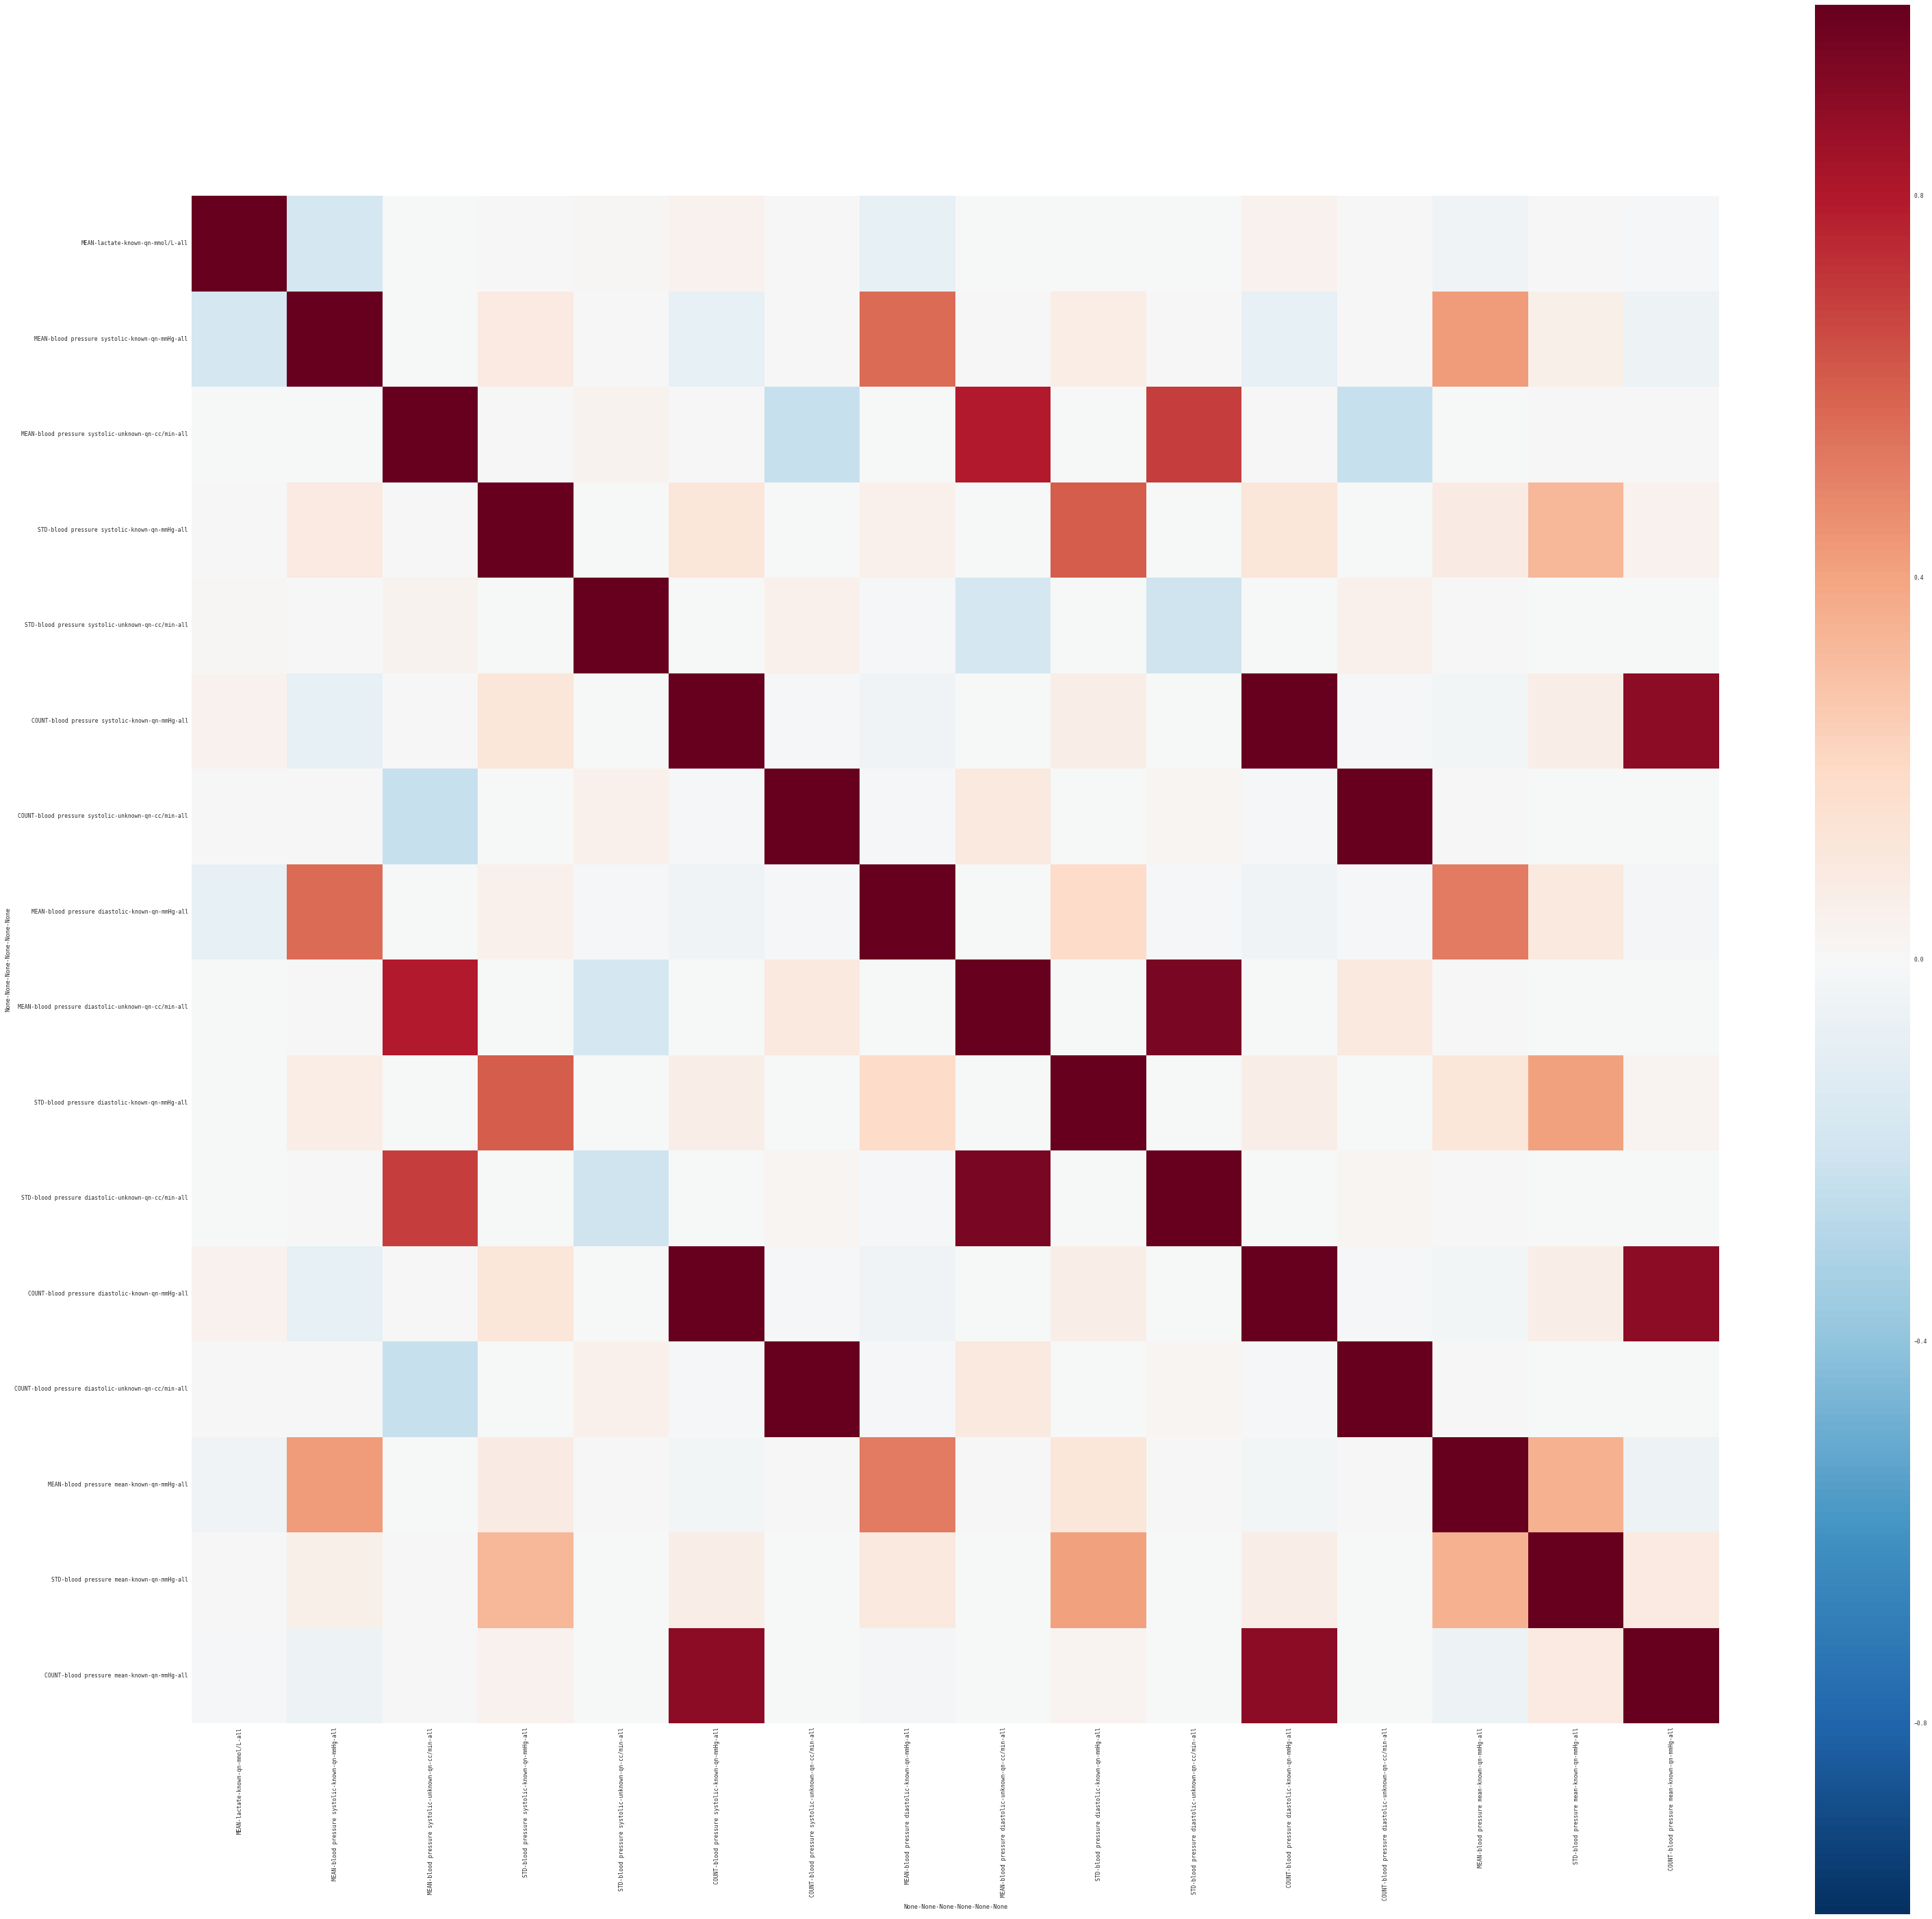

In [11]:
utils.heatmap(df_viz)

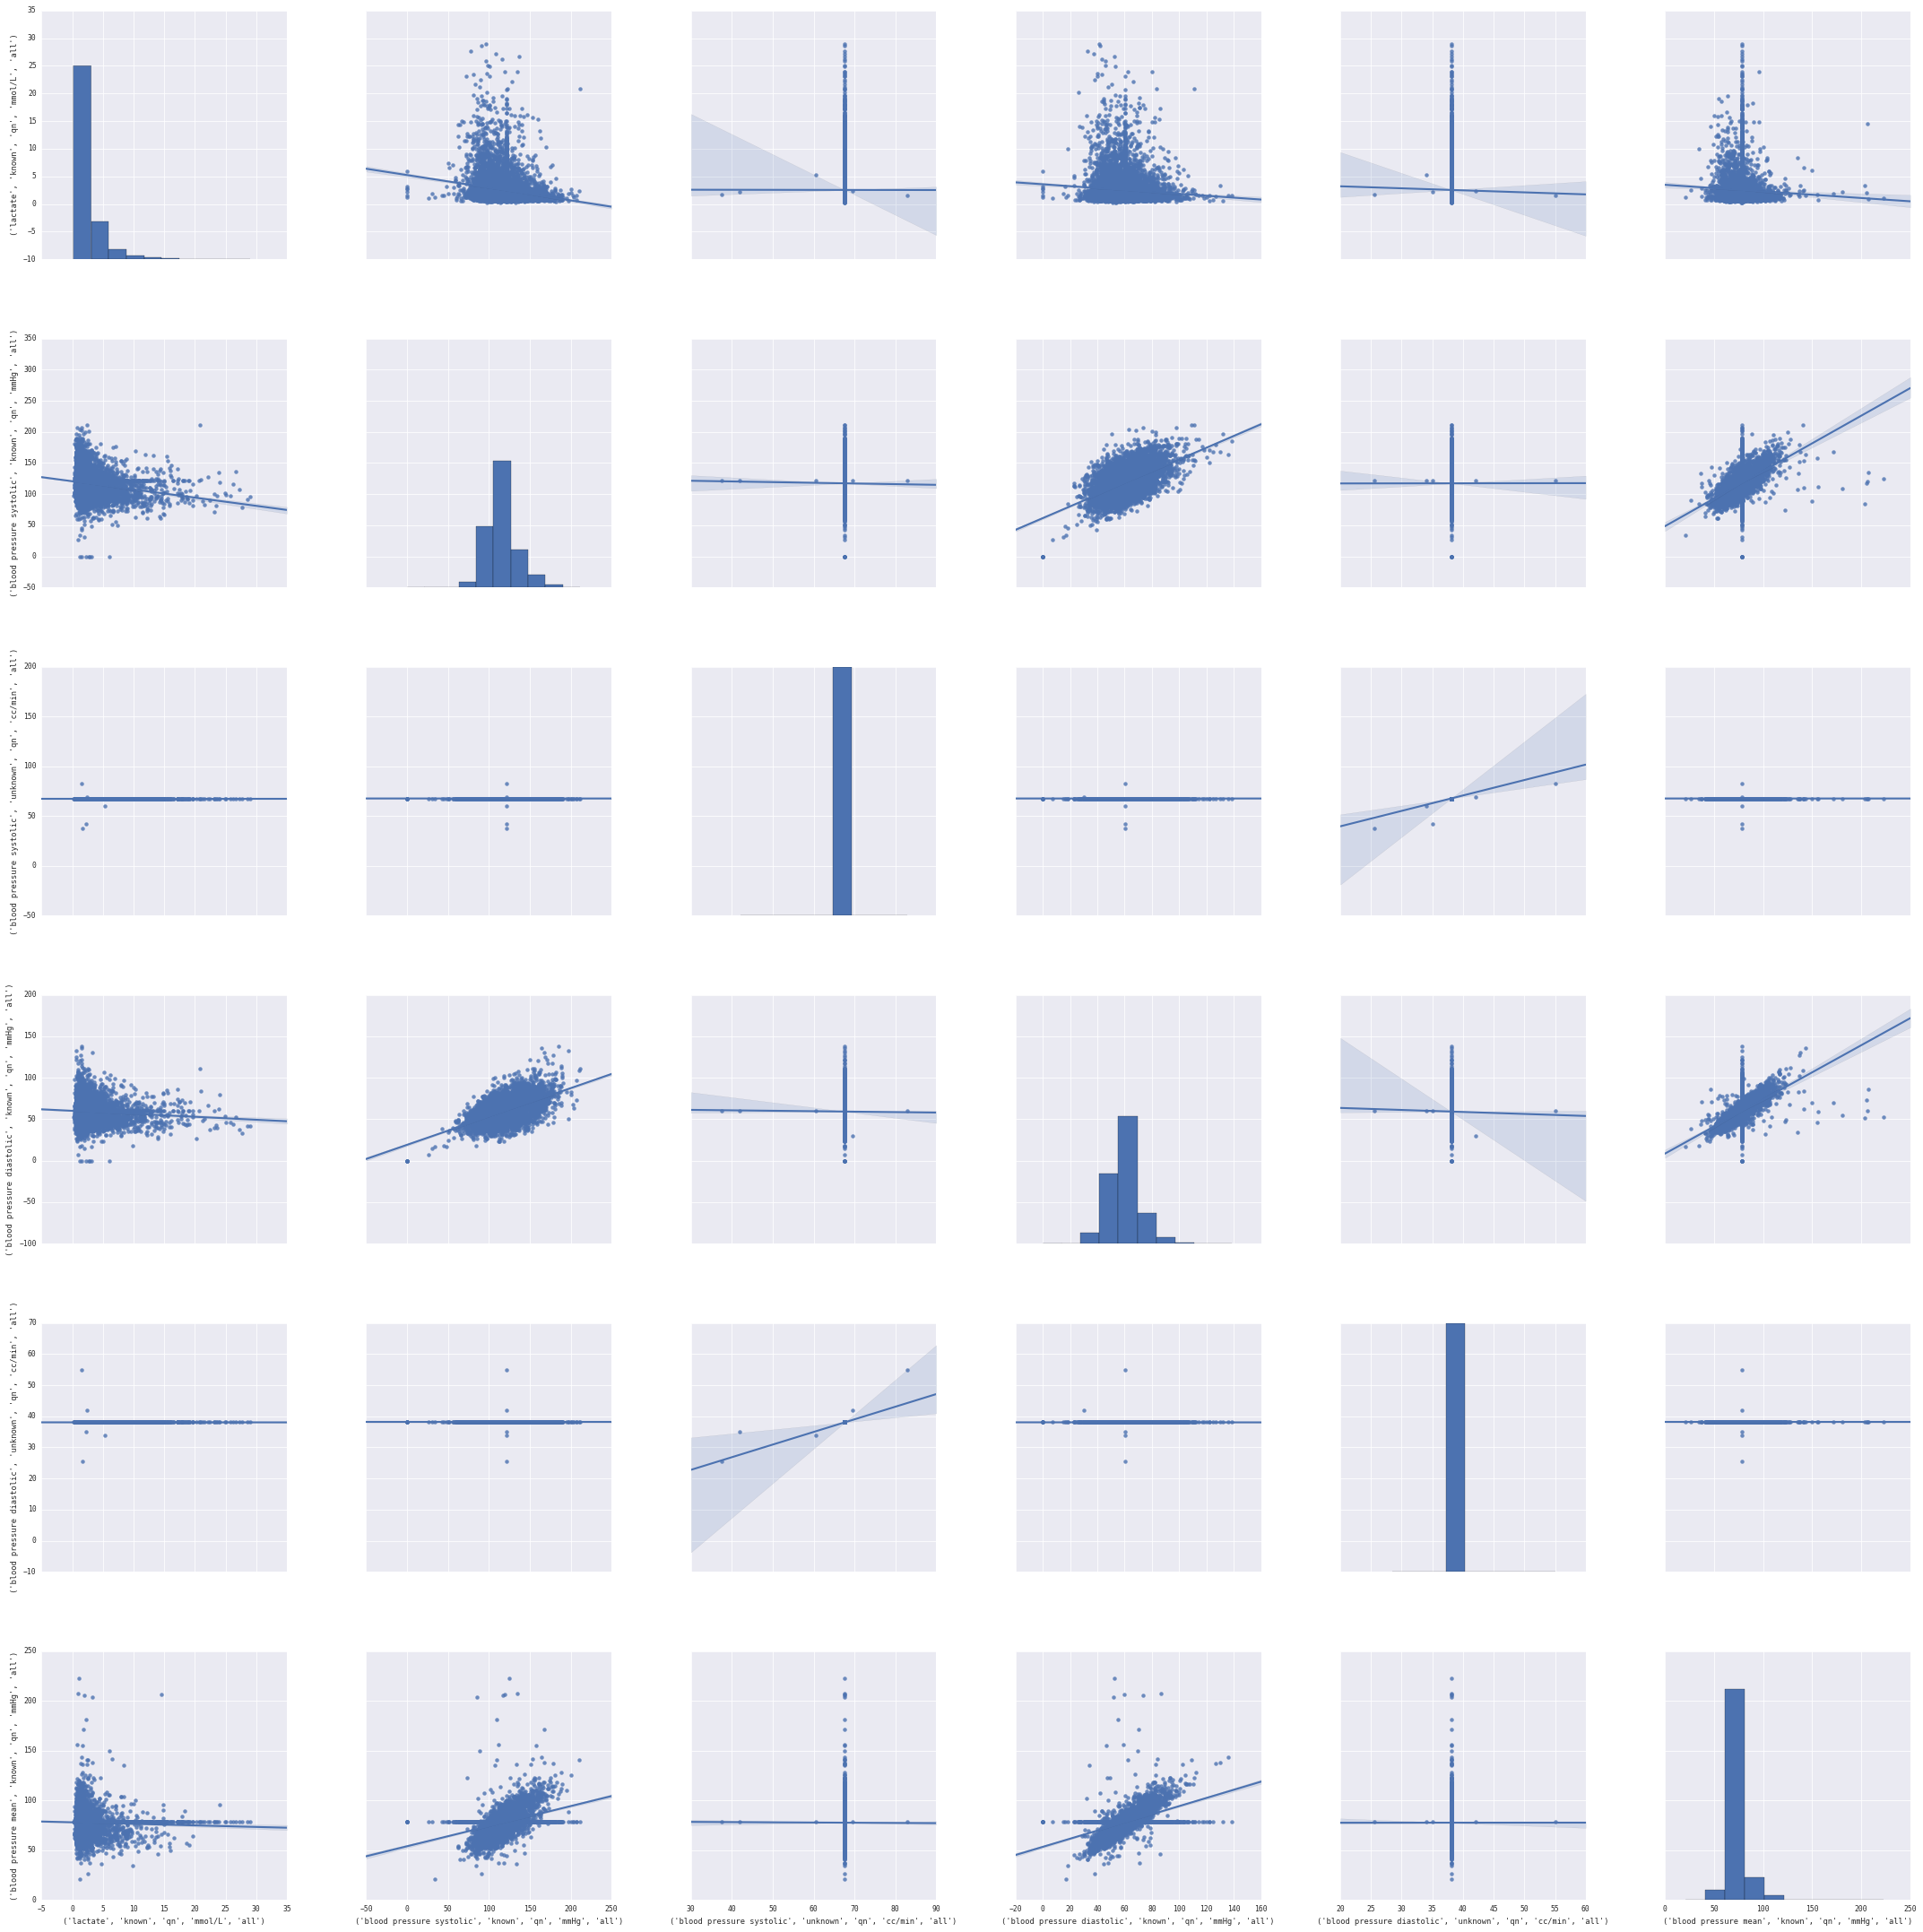

In [12]:
sns.pairplot(df_viz.loc[:,'MEAN'], size=5,kind="reg")

In [27]:
df_viz.loc[:,df_viz.columns.get_level_values('units') == 'cc/min']

,feature,MEAN,STD,COUNT,MEAN,STD,COUNT
,component,blood pressure systolic,blood pressure systolic,blood pressure systolic,blood pressure diastolic,blood pressure diastolic,blood pressure diastolic
,status,unknown,unknown,unknown,unknown,unknown,unknown
,variable_type,qn,qn,qn,qn,qn,qn
,units,cc/min,cc/min,cc/min,cc/min,cc/min,cc/min
,description,all,all,all,all,all,all
id,datetime,,,,,,
145674,2198-08-12 02:00:00,67.632113,4.625497,0,38.05494,4.708544,0
141591,2200-03-19 06:00:00,67.632113,4.625497,0,38.05494,4.708544,0
117361,2184-08-12 12:00:00,67.632113,4.625497,0,38.05494,4.708544,0
185999,2178-06-03 12:00:00,67.632113,4.625497,0,38.05494,4.708544,0


In [28]:
df_viz = df_viz.loc[:,df_viz.columns.get_level_values('units') != 'cc/min']

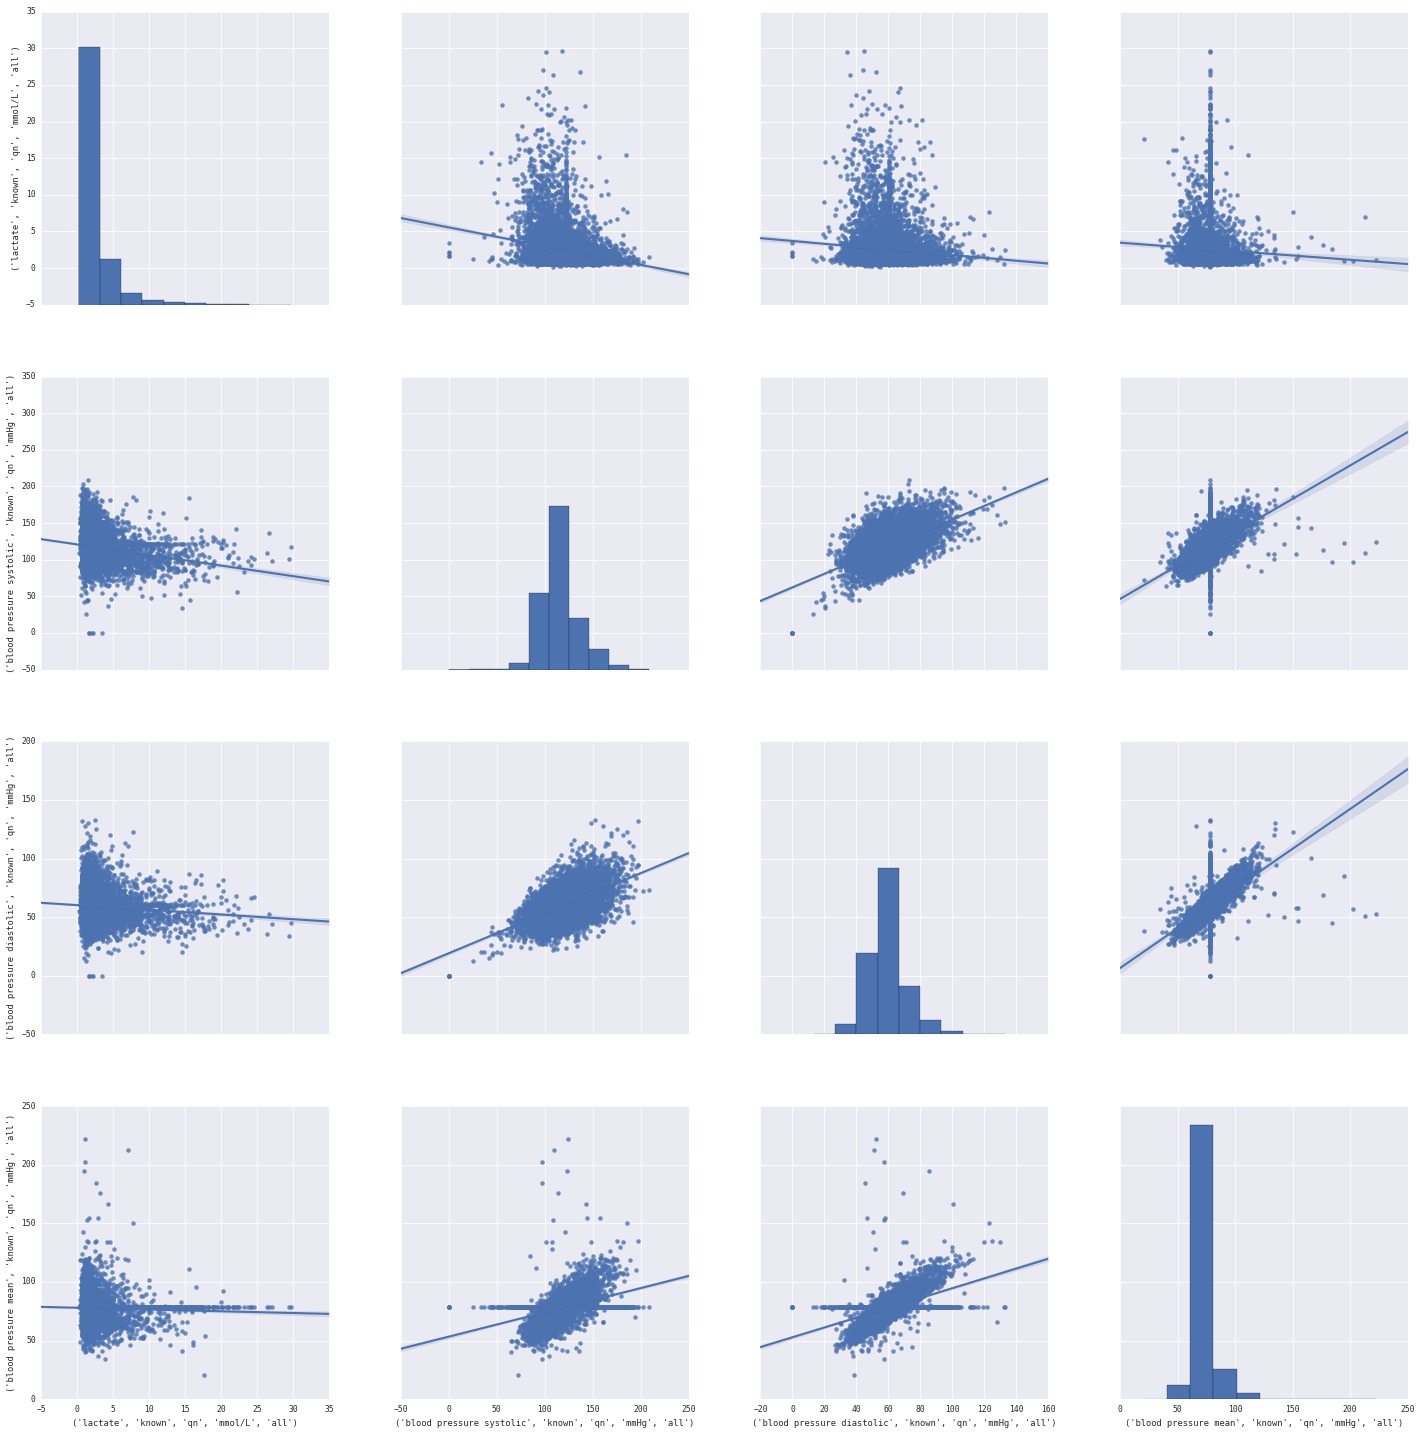

In [29]:
sns.pairplot(df_viz.loc[:,'MEAN'], size=5,kind="reg")

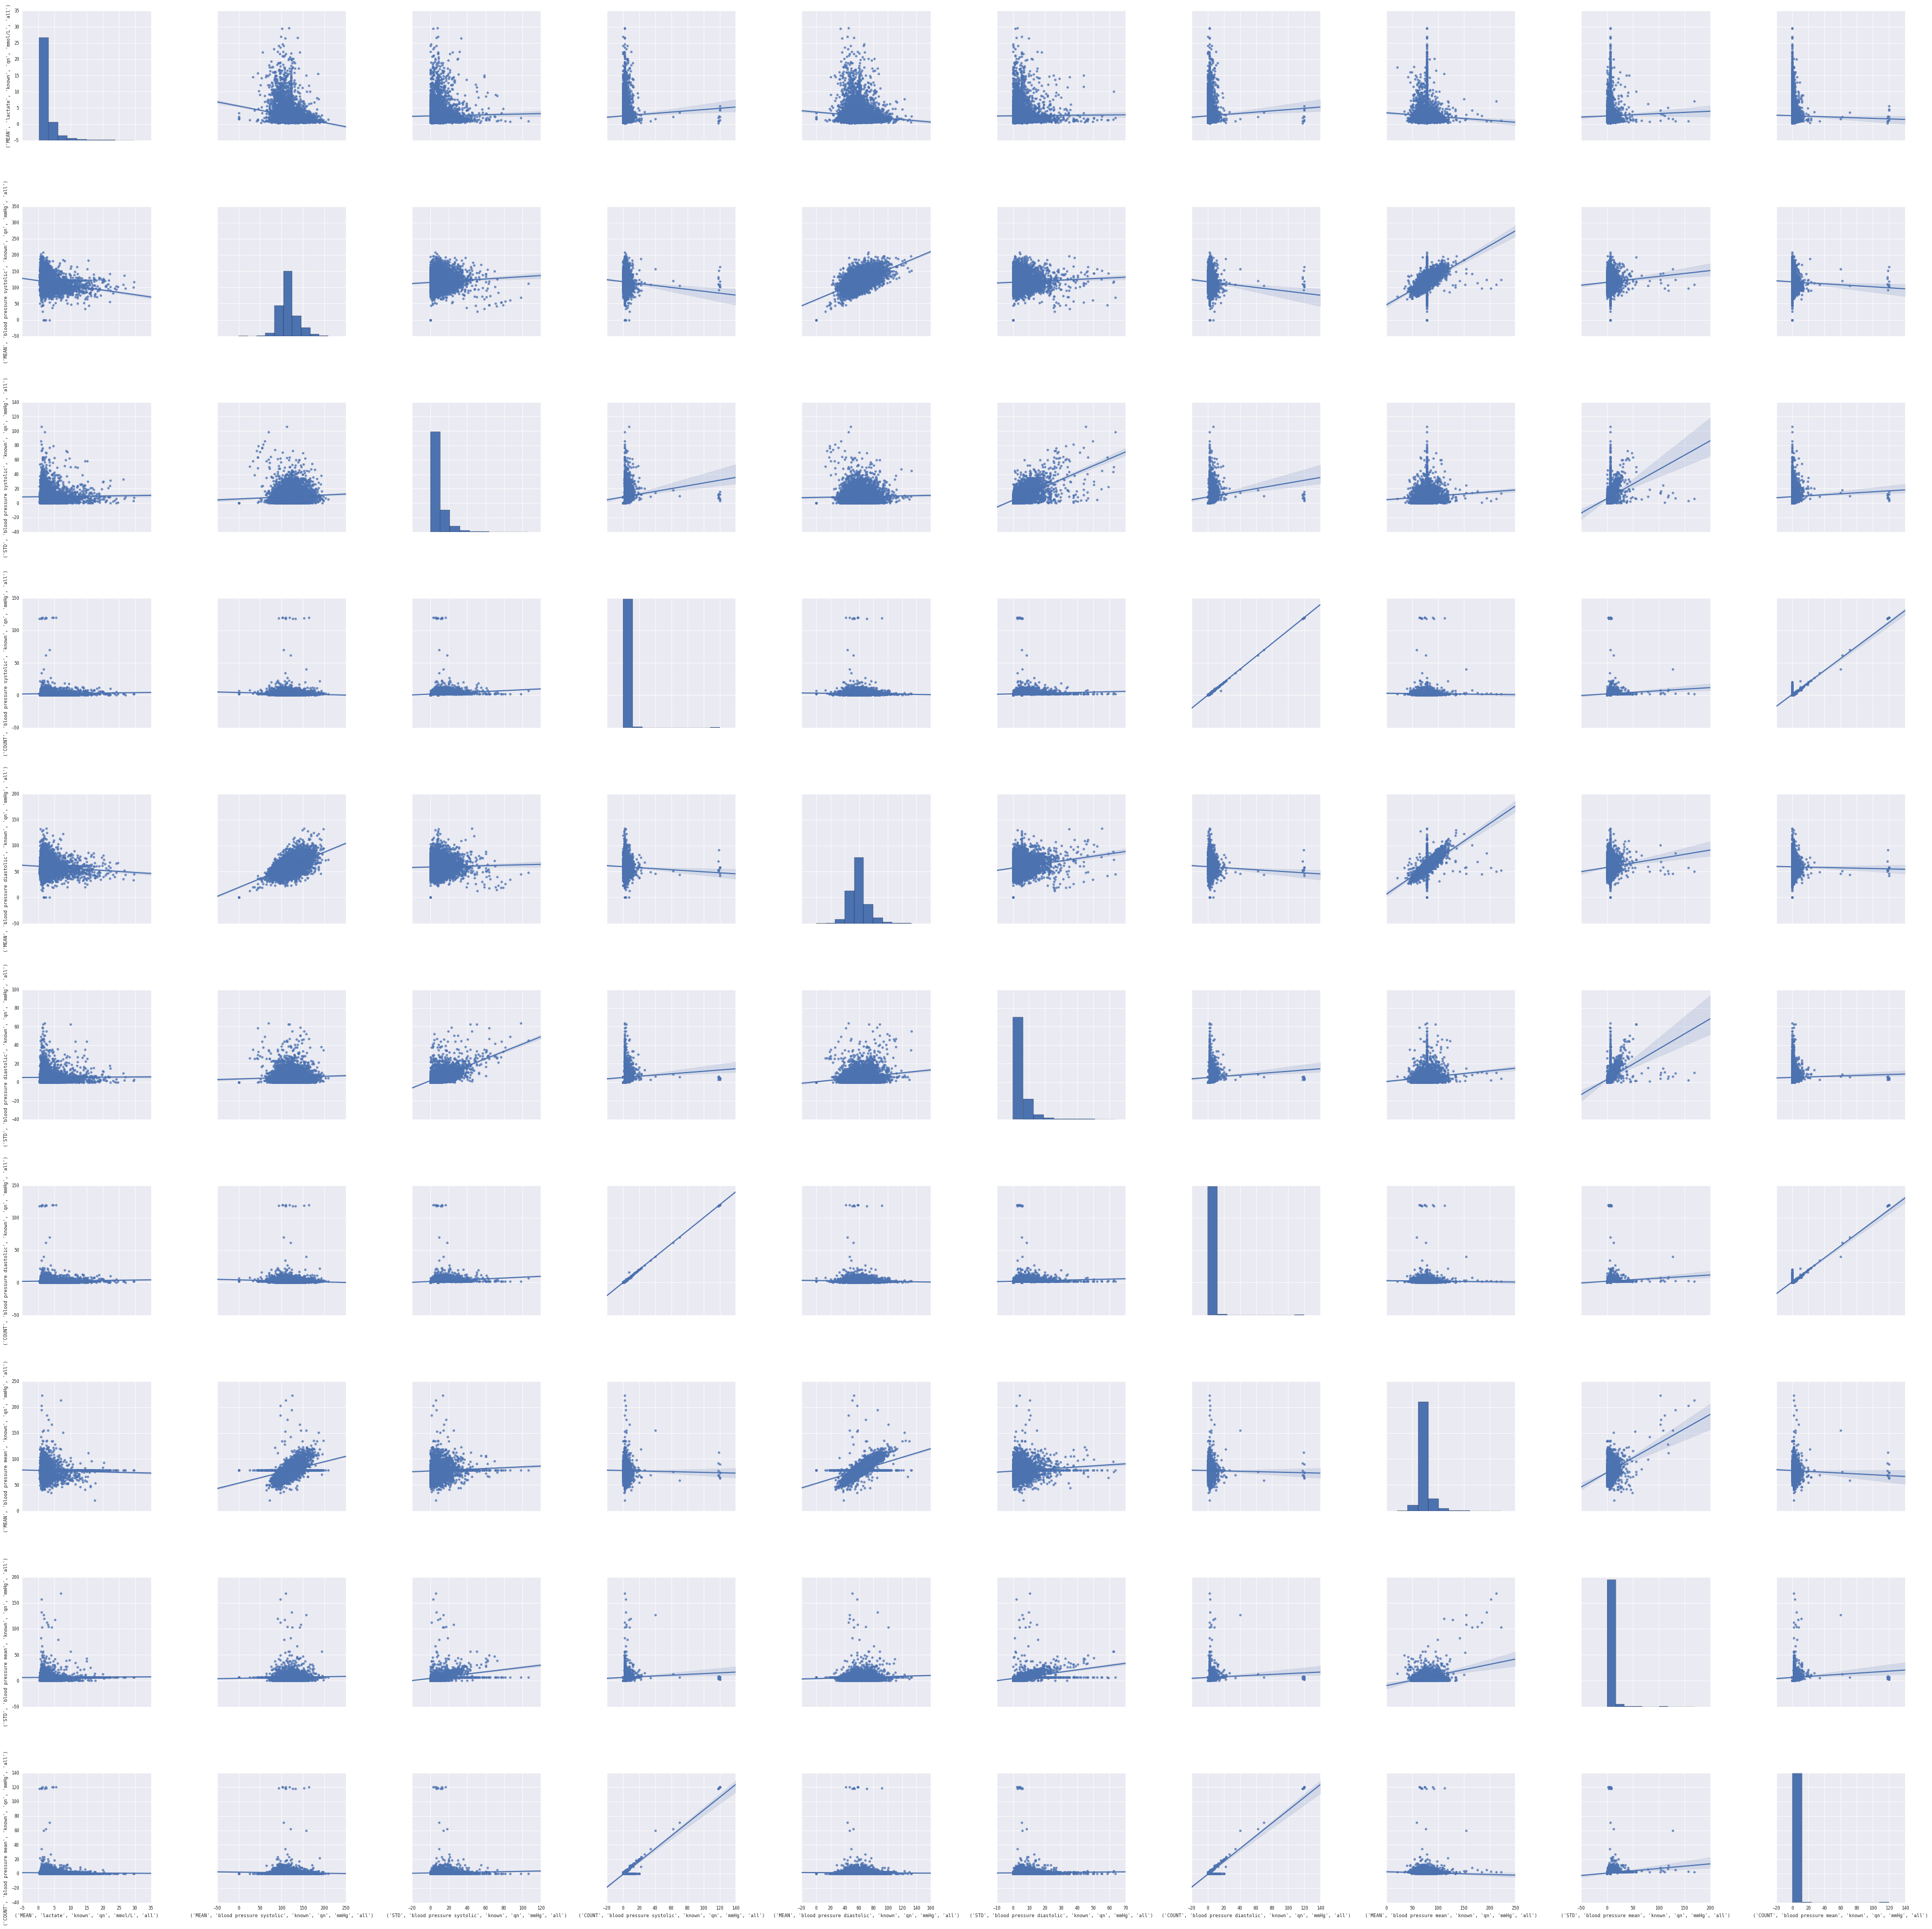

In [30]:
sns.pairplot(df_viz, size=5,kind="reg")

In [31]:
df_train_features = df_train_features.loc[:,df_train_features.columns.get_level_values('units') != 'cc/min']
df_validate_features = df_validate_features.loc[:,df_validate_features.columns.get_level_values('units') != 'cc/min']

# Models

In [134]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
scaler = StandardScaler()
X_train = df_train_features.loc[df_train_labels.index]
y_train = df_train_labels.iloc[:,0]

X_validate = df_validate_features.loc[df_validate_labels.index]
y_validate = df_validate_labels.iloc[:,0]

print X_train.shape, y_train.shape
print X_validate.shape, y_validate.shape

display(X_train.describe())
display(y_train.describe())

display(X_validate.describe())
display(y_validate.describe())

(109790, 9) (109790L,)
(14310, 9) (14310L,)


feature,MEAN,STD,COUNT,MEAN,STD,COUNT,MEAN,STD,COUNT
component,blood pressure systolic,blood pressure systolic,blood pressure systolic,blood pressure diastolic,blood pressure diastolic,blood pressure diastolic,blood pressure mean,blood pressure mean,blood pressure mean
status,known,known,known,known,known,known,known,known,known
variable_type,qn,qn,qn,qn,qn,qn,qn,qn,qn
units,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg
description,all,all,all,all,all,all,all,all,all
count,109790.000000,109790.000000,109790.000000,109790.000000,109790.000000,109790.000000,109790.000000,109790.000000,109790.000000
mean,117.155283,8.922704,2.285791,59.347698,5.238233,2.286328,77.641658,6.409453,1.082694
std,19.372014,7.924438,4.292606,11.712364,5.133249,4.292376,9.344347,5.544927,4.195216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.000000,4.242641,1.000000,52.333333,2.121320,1.000000,78.445611,6.282063,0.000000


count    109790.000000
mean          2.556414
std           2.564977
min           0.000000
25%           1.200000
50%           1.700000
75%           2.800000
max          32.000000
Name: (MEAN, lactate, known, qn, mmol/L, all), dtype: float64

feature,MEAN,STD,COUNT,MEAN,STD,COUNT,MEAN,STD,COUNT
component,blood pressure systolic,blood pressure systolic,blood pressure systolic,blood pressure diastolic,blood pressure diastolic,blood pressure diastolic,blood pressure mean,blood pressure mean,blood pressure mean
status,known,known,known,known,known,known,known,known,known
variable_type,qn,qn,qn,qn,qn,qn,qn,qn,qn
units,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg
description,all,all,all,all,all,all,all,all,all
count,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000
mean,117.130975,8.890171,2.396925,59.717135,5.271666,2.398113,77.428170,6.374251,1.196855
std,20.103899,7.824927,5.556522,12.098333,5.299199,5.557286,9.429852,5.605558,5.510138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
25%,103.500000,4.242641,1.000000,52.500000,2.121320,1.000000,78.445611,6.282063,0.000000


count    14310.000000
mean         2.467780
std          2.401089
min          0.070000
25%          1.200000
50%          1.700000
75%          2.800000
max         27.600000
Name: (MEAN, lactate, known, qn, mmol/L, all), dtype: float64

In [151]:
X_train.loc[X_train.iloc[:,2] == 120]

feature                                       MEAN                     STD  \
component                  blood pressure systolic blood pressure systolic   
status                                       known                   known   
variable_type                                   qn                      qn   
units                                         mmHg                    mmHg   
description                                    all                     all   
id     datetime                                                              
110600 2158-10-15 16:00:00              105.983333                8.679139   
       2158-10-16 22:00:00              116.175000                4.797868   
       2158-10-19 00:00:00              118.766667                6.218343   
111089 2173-11-01 02:00:00              125.275000                4.546607   
111736 2168-10-06 12:00:00              137.341667               19.323646   
116501 2148-09-12 20:00:00              147.558333                5.354329   
121639 2175-09-06 04:00:00              124.441667                5.393422   
       2175-09-09 22:00:00              108.875000                4.640998   
       2175-09-14 00:00:00               86.375000                4.570756   
127108 2134-08-29 00:00:00              102.591667               21.714920   
128104 2154-09-18 00:00:00              107.233333                7.440219   
134534 2191-08-23 00:00:00              148.900000                3.956486   
       2191-08-23 10:00:00              163.366667                6.369483   
       2191-08-24 00:00:00              127.375000               18.443674   
       2191-08-26 18:00:00              117.916667               16.071052   
       2191-08-27 00:00:00              124.000000                7.286456   
134966 2197-08-09 06:00:00              125.266667               16.005636   
137516 2179-10-23 04:00:00              117.158333               16.622853   
138159 2153-08-12 18:00:00              101.508333                5.196954   
       2153-08-13 04:00:00              109.258333               12.038800   
       2153-08-14 10:00:00              128.725000               18.917762   
       2153-08-14 14:00:00              121.658333                6.195005   
       2153-08-16 18:00:00              133.016667                5.272385   
       2153-08-17 00:00:00              129.975000                5.127718   
138211 2184-09-08 18:00:00              146.783333                7.409038   
       2184-09-09 00:00:00              134.200000               12.944354   
143290 2186-10-14 04:00:00              102.266667                8.219400   
145084 2194-09-03 18:00:00              101.266667               18.139855   
       2194-09-09 04:00:00               98.066667                7.018263   
168670 2156-07-22 10:00:00              100.558333                5.920759   
       2156-07-23 00:00:00              101.766667                3.723045   
       2156-07-28 10:00:00              102.066667                5.654972   
       2156-08-01 00:00:00              108.775000                8.321747   
187410 2177-09-30 18:00:00               98.100000                3.117853   
       2177-10-01 10:00:00               89.175000                2.549221   
       2177-10-01 12:00:00               94.041667                3.909471   
       2177-10-01 18:00:00              102.300000                2.824265   
       2177-10-01 20:00:00              102.208333                4.637980   
       2177-10-02 12:00:00              100.166667                2.580904   
       2177-10-02 22:00:00              100.425000                8.705897   

feature                                      COUNT                     MEAN  \
component                  blood pressure systolic blood pressure diastolic   
status                                       known                    known   
variable_type                                   qn                       qn   
units            

In [152]:
df_joined = utils.read_and_reconstruct('data/bp_to_lac.h5','ffill_then_mean/train/all')

In [163]:
df_joined.loc[110600].loc['2158-10-15 16:00:00':'2158-10-15 18:00:00']

component           lactate blood pressure mean blood pressure systolic  \
status                known               known                   known   
variable_type            qn                  qn                      qn   
units                mmol/L                mmHg                    mmHg   
description             all                 all                     all   
datetime                                                                  
2158-10-15 16:00:00     NaN                83.0                   111.0   
2158-10-15 16:01:00     NaN                82.0                   109.0   
2158-10-15 16:02:00     NaN                81.0                   109.0   
2158-10-15 16:03:00     NaN                82.0                   110.0   
2158-10-15 16:04:00     NaN                81.0                   108.0   
2158-10-15 16:05:00     NaN                80.0                   108.0   
2158-10-15 16:06:00     NaN                80.0                   107.0   
2158-10-15 16:07:00     NaN                81.0                   108.0   
2158-10-15 16:08:00     NaN                81.0                   107.0   
2158-10-15 16:09:00     NaN                79.0                   105.0   
2158-10-15 16:10:00     NaN                81.0                   108.0   
2158-10-15 16:11:00     NaN                80.0                   107.0   
2158-10-15 16:12:00     NaN                81.0                   108.0   
2158-10-15 16:13:00     NaN                81.0                   109.0   
2158-10-15 16:14:00     NaN                81.0                   108.0   
2158-10-15 16:15:00     NaN                82.0                   110.0   
2158-10-15 16:16:00     NaN                86.0                   115.0   
2158-10-15 16:17:00     NaN                83.0                   110.0   
2158-10-15 16:18:00     NaN                82.0                   109.0   
2158-10-15 16:19:00     NaN                83.0                   109.0   
2158-10-15 16:20:00     NaN                84.0                   111.0   
2158-10-15 16:21:00     NaN                82.0                   109.0   
2158-10-15 16:22:00     NaN                86.0                   113.0   
2158-10-15 16:23:00     NaN                86.0                   114.0   
2158-10-15 16:24:00     NaN                85.0                   118.0   
2158-10-15 16:25:00     NaN                91.0                   125.0   
2158-10-15 16:26:00     NaN                88.0                   125.0   
2158-10-15 16:27:00     NaN                89.0                   126.0   
2158-10-15 16:28:00     NaN                88.0                   124.0   
2158-10-15 16:29:00     NaN                83.0                   116.0   
...                     ...                 ...                     ...   
2158-10-15 17:31:00     NaN                75.0                   103.0   
2158-10-15 17:32:00     NaN                76.0                   106.0   
2158-10-15 17:33:00     NaN                75.0                   104.0   
2158-10-15 17:34:00     NaN                75.0                   104.0   
2158-10-15 17:35:00     NaN                76.0                   104.0   
2158-10-15 17:36:00     NaN                75.0                   103.0   
2158-10-15 17:37:00     NaN                75.0                   103.0   
2158-10-15 17:38:00     NaN                75.0                   103.0   
2158-10-15 17:39:00     NaN                74.0                   101.0   
2158-10-15 17:40:00     NaN                74.0                   102.0   
2158-10-15 17:41:00     NaN                74.0                   101.0   
2158-10-15 17:42:00     NaN                74.0                   102.0   
2158-10-15 17:43:00     NaN                73.0                   100.0   
2158-10-15 17:44:00     NaN                75.0                   102.0   
2158-10-15 17:45:00     NaN                74.0                   101.0   
2158-10-15 17:46:00     NaN                75.0                   102.0   
2158-10-15 17:47:00     N

In [111]:
lin_reg = LinearRegression()
scaler = StandardScaler()

pipeline = Pipeline([
        ('scaler',scaler),
        ('lin_reg',lin_reg)
    ])

('MEAN', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all')


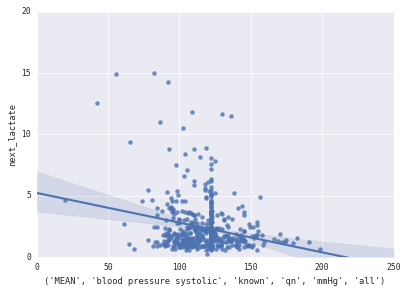

RMSE: 2.36838889034
R^2: 0.0269841432607


,0,1,2,3,4,5,6,7,8,9
predicted,2.444724,2.753414,2.391073,1.78717,2.809779,2.572244,2.895332,3.17097,3.067444,3.663295
true,2.600000,3.200000,1.700000,1.20000,0.700000,1.700000,2.500000,7.50000,8.700000,10.700000


('STD', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all')


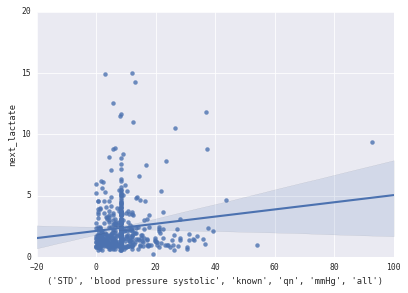

RMSE: 2.40247739588
R^2: -0.0012268965642


,0,1,2,3,4,5,6,7,8,9
predicted,2.554172,2.548808,2.589474,2.525571,2.56291,2.528475,2.546871,2.538241,2.566478,2.547113
true,2.600000,3.200000,1.700000,1.200000,0.70000,1.700000,2.500000,7.500000,8.700000,10.700000


('COUNT', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all')


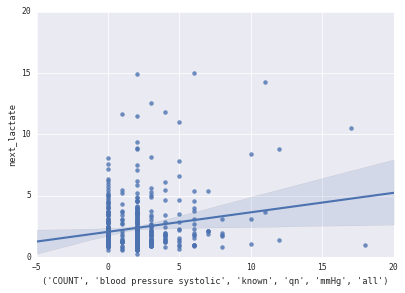

RMSE: 2.40423608483
R^2: -0.00269329219706


,0,1,2,3,4,5,6,7,8,9
predicted,2.494508,2.548674,2.548674,2.548674,2.575758,2.548674,2.711174,2.657007,2.575758,2.548674
true,2.600000,3.200000,1.700000,1.200000,0.700000,1.700000,2.500000,7.500000,8.700000,10.700000


('MEAN', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all')


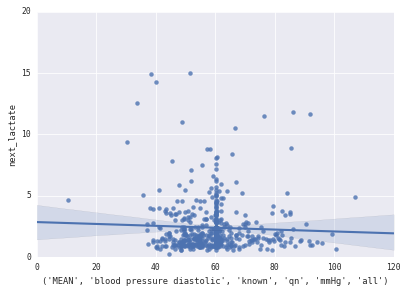

RMSE: 2.39860403276
R^2: 0.00199893117502


,0,1,2,3,4,5,6,7,8,9
predicted,2.541246,2.654303,2.712891,2.537125,2.718471,2.503646,2.641748,2.557452,2.608269,2.952825
true,2.600000,3.200000,1.700000,1.200000,0.700000,1.700000,2.500000,7.500000,8.700000,10.700000


('STD', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all')


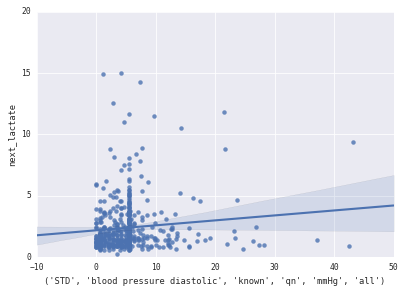

RMSE: 2.40263653499
R^2: -0.00135954267103


,0,1,2,3,4,5,6,7,8,9
predicted,2.557219,2.555435,2.557835,2.541037,2.569244,2.541037,2.567534,2.554761,2.541886,2.59276
true,2.600000,3.200000,1.700000,1.200000,0.700000,1.700000,2.500000,7.500000,8.700000,10.70000


('COUNT', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all')


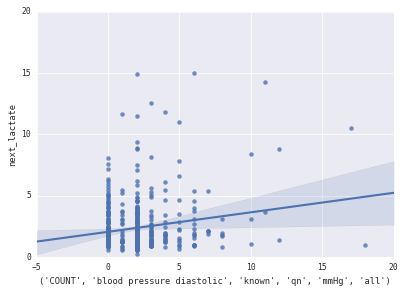

RMSE: 2.4042560788
R^2: -0.00270996934741


,0,1,2,3,4,5,6,7,8,9
predicted,2.494656,2.54868,2.54868,2.54868,2.575692,2.54868,2.710752,2.656728,2.575692,2.54868
true,2.600000,3.20000,1.70000,1.20000,0.700000,1.70000,2.500000,7.500000,8.700000,10.70000


('MEAN', 'blood pressure mean', 'known', 'qn', 'mmHg', 'all')


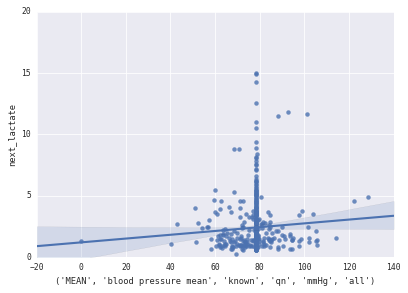

RMSE: 2.40075719147
R^2: 0.000206372547124


,0,1,2,3,4,5,6,7,8,9
predicted,2.547293,2.643117,2.547293,2.547293,2.547293,2.569368,2.684246,2.638254,2.691337,3.13856
true,2.600000,3.200000,1.700000,1.200000,0.700000,1.700000,2.500000,7.500000,8.700000,10.70000


('STD', 'blood pressure mean', 'known', 'qn', 'mmHg', 'all')


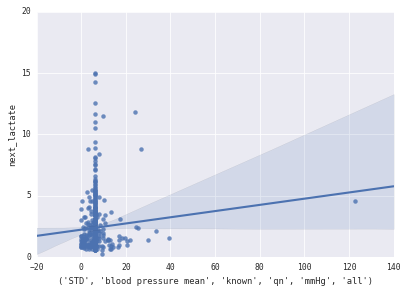

RMSE: 2.40296304082
R^2: -0.00163172028632


,0,1,2,3,4,5,6,7,8,9
predicted,2.555799,2.559613,2.555799,2.555799,2.555799,2.528845,2.557071,2.560274,2.541401,2.55334
true,2.600000,3.200000,1.700000,1.200000,0.700000,1.700000,2.500000,7.500000,8.700000,10.70000


('COUNT', 'blood pressure mean', 'known', 'qn', 'mmHg', 'all')


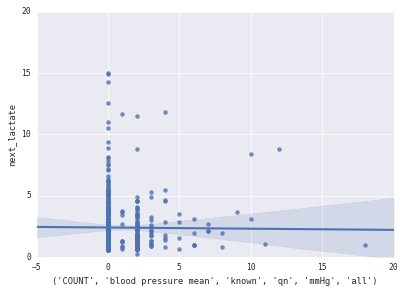

RMSE: 2.40212221064
R^2: -0.000930873195903


,0,1,2,3,4,5,6,7,8,9
predicted,2.561287,2.552286,2.561287,2.561287,2.561287,2.552286,2.525283,2.534284,2.547786,2.552286
true,2.600000,3.200000,1.700000,1.200000,0.700000,1.700000,2.500000,7.500000,8.700000,10.700000


In [168]:
random_state = 42
results= []
for col_name in X_train:
    
    #try just one feature at a time
    col_train = X_train.loc[:,[col_name]]
    col_val = X_validate.loc[:,[col_name]]

    #visualize data
    y_viz = y_train.sample(500,random_state=random_state)
    ax = sns.regplot(col_train.loc[y_viz.index],y_viz)
    ax.set(xlabel=col_name, ylabel='next_lactate',ylim=(0,20))
    
    #fit model & get predictions
    pipeline.fit(col_train,y_train)
    y_pred = pipeline.predict(col_val)
    
    #calculate error terms
    rmse = np.sqrt(mean_squared_error(y_validate,y_pred))
    r_2 = pipeline.score(col_val,y_validate)
    results.append((rmse,r_2))
    
    #display results
    print col_name
    plt.show()
    print 'RMSE:',rmse
    print 'R^2:',r_2
    display(pd.DataFrame({'predicted' :y_pred, 'true' : y_validate}).reset_index(drop=True).head(10).T)

results = pd.DataFrame(results,index=X_train.columns,columns=['rmse','r^2'])

In [131]:
results.sort_values('rmse')

rmse  \
feature component                status variable_type units description             
MEAN    blood pressure systolic  known  qn            mmHg  all          2.368389   
        blood pressure diastolic known  qn            mmHg  all          2.398604   
        blood pressure mean      known  qn            mmHg  all          2.400757   
COUNT   blood pressure mean      known  qn            mmHg  all          2.402122   
STD     blood pressure systolic  known  qn            mmHg  all          2.402477   
        blood pressure diastolic known  qn            mmHg  all          2.402637   
        blood pressure mean      known  qn            mmHg  all          2.402963   
COUNT   blood pressure systolic  known  qn            mmHg  all          2.404236   
        blood pressure diastolic known  qn            mmHg  all          2.404256   

                                                                              r^2  
feature component                status variable_type units description            
MEAN    blood pressure systolic  known  qn            mmHg  all          0.026984  
        blood pressure diastolic known  qn            mmHg  all          0.001999  
        blood pressure mean      known  qn            mmHg  all          0.000206  
COUNT   blood pressure mean      known  qn            mmHg  all         -0.000931  
STD     blood pressure systolic  known  qn            mmHg  all         -0.001227  
        blood pressure diastolic known  qn            mmHg  all         -0.001360  
        blood pressure mean      known  qn            mmHg  all         -0.001632  
COUNT   blood pressure systolic  known  qn            mmHg  all         -0.002693  
        blood pressure diastolic known  qn            mmHg  all         -0.002710

In [78]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [79]:
lin_reg.score(X_validate,y_validate)

0.043747615837409604

In [81]:
pd.Series(lin_reg.coef_,index=df_train_features.columns).sort_values()

feature  component                 status  variable_type  units  description
COUNT    blood pressure diastolic  known   qn             mmHg   all           -0.716564
         blood pressure mean       known   qn             mmHg   all           -0.553042
MEAN     blood pressure systolic   known   qn             mmHg   all           -0.525203
STD      blood pressure diastolic  known   qn             mmHg   all           -0.029548
         blood pressure systolic   known   qn             mmHg   all            0.018447
         blood pressure mean       known   qn             mmHg   all            0.040027
MEAN     blood pressure mean       known   qn             mmHg   all            0.050480
         blood pressure diastolic  known   qn             mmHg   all            0.094393
COUNT    blood pressure systolic   known   qn             mmHg   all            1.287242
dtype: float64

In [84]:
elastic_net = ElasticNet()
elastic_net.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
elastic_net.score(X_validate,y_validate)

-0.0013627693751117054

In [86]:
elastic_net.coef_

array([-0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.])

In [87]:
from sklearn.decomposition import pca

In [91]:
PCA = pca.PCA(n_components=3)

In [96]:
PCA.fit(df_train_features)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [97]:
pd.DataFrame(PCA.components_, columns = df_train_features.columns)

feature,MEAN,STD,COUNT,MEAN,STD,COUNT,MEAN,STD,COUNT
component,blood pressure systolic,blood pressure systolic,blood pressure systolic,blood pressure diastolic,blood pressure diastolic,blood pressure diastolic,blood pressure mean,blood pressure mean,blood pressure mean
status,known,known,known,known,known,known,known,known,known
variable_type,qn,qn,qn,qn,qn,qn,qn,qn,qn
units,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg,mmHg
description,all,all,all,all,all,all,all,all,all
0,0.880577,0.031337,-0.001744,0.415454,0.027883,-0.001774,0.223158,0.020438,-0.000586
1,-0.470622,0.048185,0.013539,0.790250,0.130446,0.013452,0.354840,0.089704,0.018978
2,0.013880,0.800788,0.044147,-0.223325,0.440153,0.044021,0.168052,0.286672,0.025064


In [99]:
from sklearn.pipeline import Pipeline

In [100]:
pipeline = Pipeline([
        ('PCA',pca.PCA(n_components=3)),
        ('lin_reg',LinearRegression())
    ])

In [105]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [107]:
pipeline.steps[1][1].coef_

array([-0.01993398,  0.023373  , -0.00237894])

In [108]:
pipeline.score(X_validate,y_validate)

0.029203547556638561

In [6]:
hash(' '.join(map(str,train_ids[:100])))

-560663716

In [7]:
hash(' '.join(map(str,train_ids)))

857245641

In [8]:
hash(' '.join(map(str,train_ids[:100])))

-560663716

In [9]:
ids = [1,2,2,4,3,3,2,5,10,11,10,9]

In [10]:
sorted(list(set(ids)))

[1, 2, 3, 4, 5, 9, 10, 11]

In [58]:
isinstance(df_joined1.index, pd.Index)

True

In [59]:
index = df_val1.index

In [64]:
index.size

2353

In [107]:
df_placeholder = pd.DataFrame(index=index)
df_placeholder.index.size

2353

In [110]:
df_out = df_train1.join(df_placeholder,how='right')
df_out.shape

(2353, 2)

In [102]:
df_out.drop('dropme',axis=1, inplace=True)
df_out.columns = df_train1.columns
df_out.loc[100119]

KeyError: 'dropme'

In [98]:
df_train1

feature                       MEAN   COUNT
component                  lactate lactate
status                       known   known
variable_type                   qn      qn
units                       mmol/L  mmol/L
description                    all     all
id     datetime                           
100379 2115-09-30 16:00:00    2.70       1
       2115-09-30 18:00:00     NaN       0
       2115-09-30 20:00:00     NaN       0
       2115-09-30 22:00:00     NaN       0
       2115-10-01 00:00:00     NaN       0
       2115-10-01 02:00:00     NaN       0
       2115-10-01 04:00:00    1.00       1
       2115-10-01 06:00:00     NaN       0
       2115-10-01 08:00:00     NaN       0
       2115-10-01 10:00:00     NaN       0
       2115-10-01 12:00:00     NaN       0
       2115-10-01 14:00:00    1.57       1
       2115-10-01 16:00:00     NaN       0
       2115-10-01 18:00:00     NaN       0
       2115-10-01 20:00:00     NaN       0
       2115-10-01 22:00:00     NaN       0
       2115-10-02 00:00:00     NaN       0
       2115-10-02 02:00:00     NaN       0
       2115-10-02 04:00:00     NaN       0
       2115-10-02 06:00:00     NaN       0
       2115-10-02 08:00:00     NaN       0
       2115-10-02 10:00:00     NaN       0
       2115-10-02 12:00:00     NaN       0
       2115-10-02 14:00:00    1.10       1
       2115-10-02 16:00:00     NaN       0
       2115-10-02 18:00:00     NaN       0
       2115-10-02 20:00:00     NaN       0
       2115-10-02 22:00:00     NaN       0
       2115-10-03 00:00:00     NaN       0
       2115-10-03 02:00:00     NaN       0
...                            ...     ...
199488 2107-09-13 04:00:00     NaN       0
       2107-09-13 06:00:00     NaN       0
       2107-09-13 08:00:00     NaN       0
       2107-09-13 10:00:00     NaN       0
       2107-09-13 12:00:00     NaN       0
       2107-09-13 14:00:00     NaN       0
       2107-09-13 16:00:00     NaN       0
       2107-09-13 18:00:00     NaN       0
       2107-09-13 20:00:00     NaN       0
       2107-09-13 22:00:00     NaN       0
       2107-09-14 00:00:00     NaN       0
       2107-09-14 02:00:00     NaN       0
       2107-09-14 04:00:00     NaN       0
       2107-09-14 06:00:00     NaN       0
       2107-09-14 08:00:00     NaN       0
       2107-09-14 10:00:00     NaN       0
       2107-09-14 12:00:00     NaN       0
       2107-09-14 14:00:00     NaN       0
       2107-09-14 16:00:00    1.70       1
       2107-09-14 18:00:00     NaN       0
       2107-09-14 20:00:00     NaN       0
       2107-09-14 22:00:00     NaN       0
       2107-09-15 00:00:00     NaN       0
       2107-09-15 02:00:00     NaN       0
       2107-09-15 04:00:00    1.30       1
199912 2198-09-19 02:00:00    1.50       1
199940 2108-01-11 10:00:00    1.50       1
       2108-01-11 12:00:00     NaN       0
       2108-01-11 14:00:00     NaN       0
       2108-01-11 16:00:00    1.30       1

[24212 rows x 2 columns]